In [65]:
import torch

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
# t_u = torch.tensor([32.9000, 57.2000, 59.0000, 82.4000, 51.8000, 46.4000, 37.4000, 24.8000, 42.8000, 55.4000, 69.8000])
# t_u = torch.tensor([30.3057, 56.7230, 57.9168, 79.4823, 52.3995, 47.3290, 37.7892, 25.9138, 43.6609, 56.5834, 71.3901])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [66]:
def model(t_u, w, b):
    return w * t_u + b

In [67]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [68]:
w = torch.ones(1)
b = torch.zeros(1)

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [69]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [70]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [71]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [72]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [73]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

In [74]:
def model(t_u, w, b):
    return w * t_u + b

In [75]:
def dmodel_dw(t_u, w, b):
    return t_u

In [76]:
def dmodel_db(t_u, w, b):
    return 1.0

In [77]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [78]:
params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 1763.884644
Params: tensor([1., 0.])
Grad: tensor([4517.2964,   82.6000])
Epoch 1, Loss 5802484.500000
Params: tensor([-44.1730,  -0.8260])
Grad: tensor([-261257.4062,   -4598.9707])
Epoch 2, Loss 19408031744.000000
Params: tensor([2568.4011,   45.1637])
Grad: tensor([15109615.0000,   266155.7188])
Epoch 3, Loss 64915909902336.000000
Params: tensor([-148527.7344,   -2616.3933])
Grad: tensor([-873852544.,  -15392727.])
Epoch 4, Loss 217130439561707520.000000
Params: tensor([8589997.0000,  151310.8750])
Grad: tensor([50538569728.,   890226304.])
Epoch 5, Loss 726257020202974707712.000000
Params: tensor([-496795712.,   -8750952.])
Grad: tensor([-2922858414080.,   -51485540352.])
Epoch 6, Loss 2429181687085405986357248.000000
Params: tensor([28731787264.,   506104448.])
Grad: tensor([169041222172672.,   2977625538560.])
Epoch 7, Loss 8125117236949438203699396608.000000
Params: tensor([-1661680353280.,   -29270151168.])
Grad: tensor([-9776366694170624.,  -172208609558528.])
Ep

Params: tensor([nan, nan])
Grad: tensor([nan, nan])
Epoch 98, Loss nan
Params: tensor([nan, nan])
Grad: tensor([nan, nan])
Epoch 99, Loss nan
Params: tensor([nan, nan])
Grad: tensor([nan, nan])


tensor([nan, nan])

In [79]:
params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-4

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 1763.884644
Params: tensor([1., 0.])
Grad: tensor([4517.2964,   82.6000])
Epoch 1, Loss 323.090546
Params: tensor([ 0.5483, -0.0083])
Grad: tensor([1859.5493,   35.7843])
Epoch 2, Loss 78.929634
Params: tensor([ 0.3623, -0.0118])
Grad: tensor([765.4666,  16.5122])
Epoch 3, Loss 37.552845
Params: tensor([ 0.2858, -0.0135])
Grad: tensor([315.0790,   8.5787])
Epoch 4, Loss 30.540285
Params: tensor([ 0.2543, -0.0143])
Grad: tensor([129.6733,   5.3127])
Epoch 5, Loss 29.351152
Params: tensor([ 0.2413, -0.0149])
Grad: tensor([53.3496,  3.9682])
Epoch 6, Loss 29.148882
Params: tensor([ 0.2360, -0.0153])
Grad: tensor([21.9304,  3.4148])
Epoch 7, Loss 29.113848
Params: tensor([ 0.2338, -0.0156])
Grad: tensor([8.9964, 3.1869])
Epoch 8, Loss 29.107145
Params: tensor([ 0.2329, -0.0159])
Grad: tensor([3.6721, 3.0930])
Epoch 9, Loss 29.105242
Params: tensor([ 0.2325, -0.0162])
Grad: tensor([1.4803, 3.0544])
Epoch 10, Loss 29.104168
Params: tensor([ 0.2324, -0.0166])
Grad: tensor([0.578

tensor([ 0.2327, -0.0438])

In [62]:
t_un = 0.1 * t_u

In [83]:
params = torch.tensor([1.0, 0.0])

nepochs = 100

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    print('Params:', params)
    print('Grad:', grad)
    
    params = params - learning_rate * grad
    
params

Epoch 0, Loss 80.364342
Params: tensor([1., 0.])
Grad: tensor([-77.6140, -10.6400])
Epoch 1, Loss 37.574917
Params: tensor([1.7761, 0.1064])
Grad: tensor([-30.8623,  -2.3864])
Epoch 2, Loss 30.871077
Params: tensor([2.0848, 0.1303])
Grad: tensor([-12.4631,   0.8587])
Epoch 3, Loss 29.756193
Params: tensor([2.2094, 0.1217])
Grad: tensor([-5.2218,  2.1327])
Epoch 4, Loss 29.507149
Params: tensor([2.2616, 0.1004])
Grad: tensor([-2.3715,  2.6310])
Epoch 5, Loss 29.392458
Params: tensor([2.2853, 0.0740])
Grad: tensor([-1.2492,  2.8241])
Epoch 6, Loss 29.298828
Params: tensor([2.2978, 0.0458])
Grad: tensor([-0.8071,  2.8970])
Epoch 7, Loss 29.208717
Params: tensor([2.3059, 0.0168])
Grad: tensor([-0.6325,  2.9227])
Epoch 8, Loss 29.119417
Params: tensor([ 2.3122, -0.0124])
Grad: tensor([-0.5633,  2.9298])
Epoch 9, Loss 29.030487
Params: tensor([ 2.3178, -0.0417])
Grad: tensor([-0.5355,  2.9295])
Epoch 10, Loss 28.941875
Params: tensor([ 2.3232, -0.0710])
Grad: tensor([-0.5240,  2.9264])
Epoch

Epoch 94, Loss 22.478304
Params: tensor([ 2.7285, -2.3646])
Grad: tensor([-0.4483,  2.5380])
Epoch 95, Loss 22.411938
Params: tensor([ 2.7330, -2.3900])
Grad: tensor([-0.4476,  2.5337])
Epoch 96, Loss 22.345795
Params: tensor([ 2.7374, -2.4153])
Grad: tensor([-0.4468,  2.5294])
Epoch 97, Loss 22.279875
Params: tensor([ 2.7419, -2.4406])
Grad: tensor([-0.4461,  2.5251])
Epoch 98, Loss 22.214186
Params: tensor([ 2.7464, -2.4658])
Grad: tensor([-0.4453,  2.5208])
Epoch 99, Loss 22.148710
Params: tensor([ 2.7508, -2.4910])
Grad: tensor([-0.4445,  2.5165])


tensor([ 2.7553, -2.5162])

In [84]:
params = torch.tensor([1.0, 0.0])

nepochs = 5000

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_un, w, b)

    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    grad = grad_fn(t_un, t_c, t_p, w, b)

    params = params - learning_rate * grad
    
params

Epoch 0, Loss 80.364342
Epoch 1, Loss 37.574917
Epoch 2, Loss 30.871077
Epoch 3, Loss 29.756193
Epoch 4, Loss 29.507149
Epoch 5, Loss 29.392458
Epoch 6, Loss 29.298828
Epoch 7, Loss 29.208717
Epoch 8, Loss 29.119417
Epoch 9, Loss 29.030487
Epoch 10, Loss 28.941875
Epoch 11, Loss 28.853565
Epoch 12, Loss 28.765556
Epoch 13, Loss 28.677851
Epoch 14, Loss 28.590431
Epoch 15, Loss 28.503321
Epoch 16, Loss 28.416496
Epoch 17, Loss 28.329975
Epoch 18, Loss 28.243738
Epoch 19, Loss 28.157801
Epoch 20, Loss 28.072151
Epoch 21, Loss 27.986799
Epoch 22, Loss 27.901731
Epoch 23, Loss 27.816956
Epoch 24, Loss 27.732466
Epoch 25, Loss 27.648256
Epoch 26, Loss 27.564342
Epoch 27, Loss 27.480711
Epoch 28, Loss 27.397358
Epoch 29, Loss 27.314295
Epoch 30, Loss 27.231512
Epoch 31, Loss 27.149006
Epoch 32, Loss 27.066790
Epoch 33, Loss 26.984844
Epoch 34, Loss 26.903173
Epoch 35, Loss 26.821791
Epoch 36, Loss 26.740675
Epoch 37, Loss 26.659838
Epoch 38, Loss 26.579279
Epoch 39, Loss 26.498987
Epoch 40, 

Epoch 460, Loss 8.559597
Epoch 461, Loss 8.540478
Epoch 462, Loss 8.521426
Epoch 463, Loss 8.502438
Epoch 464, Loss 8.483516
Epoch 465, Loss 8.464652
Epoch 466, Loss 8.445858
Epoch 467, Loss 8.427128
Epoch 468, Loss 8.408456
Epoch 469, Loss 8.389848
Epoch 470, Loss 8.371305
Epoch 471, Loss 8.352828
Epoch 472, Loss 8.334408
Epoch 473, Loss 8.316055
Epoch 474, Loss 8.297764
Epoch 475, Loss 8.279534
Epoch 476, Loss 8.261369
Epoch 477, Loss 8.243261
Epoch 478, Loss 8.225213
Epoch 479, Loss 8.207232
Epoch 480, Loss 8.189310
Epoch 481, Loss 8.171450
Epoch 482, Loss 8.153648
Epoch 483, Loss 8.135907
Epoch 484, Loss 8.118226
Epoch 485, Loss 8.100607
Epoch 486, Loss 8.083045
Epoch 487, Loss 8.065548
Epoch 488, Loss 8.048104
Epoch 489, Loss 8.030723
Epoch 490, Loss 8.013400
Epoch 491, Loss 7.996135
Epoch 492, Loss 7.978929
Epoch 493, Loss 7.961784
Epoch 494, Loss 7.944690
Epoch 495, Loss 7.927662
Epoch 496, Loss 7.910690
Epoch 497, Loss 7.893775
Epoch 498, Loss 7.876915
Epoch 499, Loss 7.860116


Epoch 889, Loss 4.237185
Epoch 890, Loss 4.232740
Epoch 891, Loss 4.228308
Epoch 892, Loss 4.223895
Epoch 893, Loss 4.219494
Epoch 894, Loss 4.215109
Epoch 895, Loss 4.210737
Epoch 896, Loss 4.206383
Epoch 897, Loss 4.202042
Epoch 898, Loss 4.197715
Epoch 899, Loss 4.193405
Epoch 900, Loss 4.189108
Epoch 901, Loss 4.184825
Epoch 902, Loss 4.180559
Epoch 903, Loss 4.176305
Epoch 904, Loss 4.172065
Epoch 905, Loss 4.167842
Epoch 906, Loss 4.163631
Epoch 907, Loss 4.159436
Epoch 908, Loss 4.155253
Epoch 909, Loss 4.151086
Epoch 910, Loss 4.146934
Epoch 911, Loss 4.142795
Epoch 912, Loss 4.138669
Epoch 913, Loss 4.134559
Epoch 914, Loss 4.130464
Epoch 915, Loss 4.126378
Epoch 916, Loss 4.122310
Epoch 917, Loss 4.118254
Epoch 918, Loss 4.114213
Epoch 919, Loss 4.110184
Epoch 920, Loss 4.106169
Epoch 921, Loss 4.102170
Epoch 922, Loss 4.098181
Epoch 923, Loss 4.094210
Epoch 924, Loss 4.090249
Epoch 925, Loss 4.086300
Epoch 926, Loss 4.082366
Epoch 927, Loss 4.078448
Epoch 928, Loss 4.074541


Epoch 1331, Loss 3.218975
Epoch 1332, Loss 3.217986
Epoch 1333, Loss 3.217000
Epoch 1334, Loss 3.216017
Epoch 1335, Loss 3.215039
Epoch 1336, Loss 3.214062
Epoch 1337, Loss 3.213092
Epoch 1338, Loss 3.212122
Epoch 1339, Loss 3.211157
Epoch 1340, Loss 3.210193
Epoch 1341, Loss 3.209235
Epoch 1342, Loss 3.208279
Epoch 1343, Loss 3.207326
Epoch 1344, Loss 3.206376
Epoch 1345, Loss 3.205430
Epoch 1346, Loss 3.204488
Epoch 1347, Loss 3.203547
Epoch 1348, Loss 3.202611
Epoch 1349, Loss 3.201678
Epoch 1350, Loss 3.200747
Epoch 1351, Loss 3.199820
Epoch 1352, Loss 3.198897
Epoch 1353, Loss 3.197976
Epoch 1354, Loss 3.197060
Epoch 1355, Loss 3.196144
Epoch 1356, Loss 3.195231
Epoch 1357, Loss 3.194324
Epoch 1358, Loss 3.193419
Epoch 1359, Loss 3.192517
Epoch 1360, Loss 3.191616
Epoch 1361, Loss 3.190720
Epoch 1362, Loss 3.189829
Epoch 1363, Loss 3.188937
Epoch 1364, Loss 3.188051
Epoch 1365, Loss 3.187166
Epoch 1366, Loss 3.186288
Epoch 1367, Loss 3.185409
Epoch 1368, Loss 3.184535
Epoch 1369, 

Epoch 1808, Loss 2.985184
Epoch 1809, Loss 2.984989
Epoch 1810, Loss 2.984793
Epoch 1811, Loss 2.984601
Epoch 1812, Loss 2.984406
Epoch 1813, Loss 2.984215
Epoch 1814, Loss 2.984022
Epoch 1815, Loss 2.983830
Epoch 1816, Loss 2.983639
Epoch 1817, Loss 2.983449
Epoch 1818, Loss 2.983260
Epoch 1819, Loss 2.983073
Epoch 1820, Loss 2.982884
Epoch 1821, Loss 2.982697
Epoch 1822, Loss 2.982510
Epoch 1823, Loss 2.982322
Epoch 1824, Loss 2.982137
Epoch 1825, Loss 2.981953
Epoch 1826, Loss 2.981769
Epoch 1827, Loss 2.981586
Epoch 1828, Loss 2.981402
Epoch 1829, Loss 2.981219
Epoch 1830, Loss 2.981037
Epoch 1831, Loss 2.980856
Epoch 1832, Loss 2.980676
Epoch 1833, Loss 2.980495
Epoch 1834, Loss 2.980316
Epoch 1835, Loss 2.980137
Epoch 1836, Loss 2.979958
Epoch 1837, Loss 2.979782
Epoch 1838, Loss 2.979604
Epoch 1839, Loss 2.979428
Epoch 1840, Loss 2.979253
Epoch 1841, Loss 2.979078
Epoch 1842, Loss 2.978902
Epoch 1843, Loss 2.978729
Epoch 1844, Loss 2.978555
Epoch 1845, Loss 2.978382
Epoch 1846, 

Epoch 2212, Loss 2.942211
Epoch 2213, Loss 2.942162
Epoch 2214, Loss 2.942112
Epoch 2215, Loss 2.942062
Epoch 2216, Loss 2.942014
Epoch 2217, Loss 2.941965
Epoch 2218, Loss 2.941918
Epoch 2219, Loss 2.941868
Epoch 2220, Loss 2.941821
Epoch 2221, Loss 2.941773
Epoch 2222, Loss 2.941725
Epoch 2223, Loss 2.941677
Epoch 2224, Loss 2.941629
Epoch 2225, Loss 2.941582
Epoch 2226, Loss 2.941534
Epoch 2227, Loss 2.941488
Epoch 2228, Loss 2.941440
Epoch 2229, Loss 2.941393
Epoch 2230, Loss 2.941346
Epoch 2231, Loss 2.941299
Epoch 2232, Loss 2.941252
Epoch 2233, Loss 2.941206
Epoch 2234, Loss 2.941163
Epoch 2235, Loss 2.941115
Epoch 2236, Loss 2.941070
Epoch 2237, Loss 2.941025
Epoch 2238, Loss 2.940979
Epoch 2239, Loss 2.940933
Epoch 2240, Loss 2.940890
Epoch 2241, Loss 2.940844
Epoch 2242, Loss 2.940798
Epoch 2243, Loss 2.940753
Epoch 2244, Loss 2.940711
Epoch 2245, Loss 2.940666
Epoch 2246, Loss 2.940621
Epoch 2247, Loss 2.940576
Epoch 2248, Loss 2.940533
Epoch 2249, Loss 2.940489
Epoch 2250, 

Epoch 2665, Loss 2.930766
Epoch 2666, Loss 2.930757
Epoch 2667, Loss 2.930746
Epoch 2668, Loss 2.930735
Epoch 2669, Loss 2.930724
Epoch 2670, Loss 2.930715
Epoch 2671, Loss 2.930704
Epoch 2672, Loss 2.930694
Epoch 2673, Loss 2.930685
Epoch 2674, Loss 2.930674
Epoch 2675, Loss 2.930663
Epoch 2676, Loss 2.930654
Epoch 2677, Loss 2.930644
Epoch 2678, Loss 2.930631
Epoch 2679, Loss 2.930622
Epoch 2680, Loss 2.930614
Epoch 2681, Loss 2.930603
Epoch 2682, Loss 2.930592
Epoch 2683, Loss 2.930582
Epoch 2684, Loss 2.930572
Epoch 2685, Loss 2.930562
Epoch 2686, Loss 2.930552
Epoch 2687, Loss 2.930543
Epoch 2688, Loss 2.930534
Epoch 2689, Loss 2.930524
Epoch 2690, Loss 2.930514
Epoch 2691, Loss 2.930502
Epoch 2692, Loss 2.930493
Epoch 2693, Loss 2.930482
Epoch 2694, Loss 2.930474
Epoch 2695, Loss 2.930465
Epoch 2696, Loss 2.930454
Epoch 2697, Loss 2.930446
Epoch 2698, Loss 2.930436
Epoch 2699, Loss 2.930426
Epoch 2700, Loss 2.930417
Epoch 2701, Loss 2.930408
Epoch 2702, Loss 2.930398
Epoch 2703, 

Epoch 3079, Loss 2.928410
Epoch 3080, Loss 2.928407
Epoch 3081, Loss 2.928404
Epoch 3082, Loss 2.928402
Epoch 3083, Loss 2.928399
Epoch 3084, Loss 2.928396
Epoch 3085, Loss 2.928396
Epoch 3086, Loss 2.928392
Epoch 3087, Loss 2.928389
Epoch 3088, Loss 2.928386
Epoch 3089, Loss 2.928383
Epoch 3090, Loss 2.928383
Epoch 3091, Loss 2.928379
Epoch 3092, Loss 2.928378
Epoch 3093, Loss 2.928375
Epoch 3094, Loss 2.928372
Epoch 3095, Loss 2.928370
Epoch 3096, Loss 2.928368
Epoch 3097, Loss 2.928364
Epoch 3098, Loss 2.928362
Epoch 3099, Loss 2.928361
Epoch 3100, Loss 2.928357
Epoch 3101, Loss 2.928355
Epoch 3102, Loss 2.928353
Epoch 3103, Loss 2.928349
Epoch 3104, Loss 2.928348
Epoch 3105, Loss 2.928345
Epoch 3106, Loss 2.928343
Epoch 3107, Loss 2.928340
Epoch 3108, Loss 2.928339
Epoch 3109, Loss 2.928337
Epoch 3110, Loss 2.928333
Epoch 3111, Loss 2.928332
Epoch 3112, Loss 2.928328
Epoch 3113, Loss 2.928329
Epoch 3114, Loss 2.928324
Epoch 3115, Loss 2.928323
Epoch 3116, Loss 2.928320
Epoch 3117, 

Epoch 3524, Loss 2.927814
Epoch 3525, Loss 2.927813
Epoch 3526, Loss 2.927814
Epoch 3527, Loss 2.927814
Epoch 3528, Loss 2.927812
Epoch 3529, Loss 2.927812
Epoch 3530, Loss 2.927810
Epoch 3531, Loss 2.927811
Epoch 3532, Loss 2.927810
Epoch 3533, Loss 2.927808
Epoch 3534, Loss 2.927809
Epoch 3535, Loss 2.927808
Epoch 3536, Loss 2.927807
Epoch 3537, Loss 2.927808
Epoch 3538, Loss 2.927806
Epoch 3539, Loss 2.927805
Epoch 3540, Loss 2.927806
Epoch 3541, Loss 2.927805
Epoch 3542, Loss 2.927804
Epoch 3543, Loss 2.927805
Epoch 3544, Loss 2.927803
Epoch 3545, Loss 2.927802
Epoch 3546, Loss 2.927803
Epoch 3547, Loss 2.927801
Epoch 3548, Loss 2.927802
Epoch 3549, Loss 2.927799
Epoch 3550, Loss 2.927800
Epoch 3551, Loss 2.927799
Epoch 3552, Loss 2.927799
Epoch 3553, Loss 2.927798
Epoch 3554, Loss 2.927798
Epoch 3555, Loss 2.927797
Epoch 3556, Loss 2.927798
Epoch 3557, Loss 2.927795
Epoch 3558, Loss 2.927796
Epoch 3559, Loss 2.927795
Epoch 3560, Loss 2.927795
Epoch 3561, Loss 2.927793
Epoch 3562, 

Epoch 3930, Loss 2.927688
Epoch 3931, Loss 2.927688
Epoch 3932, Loss 2.927687
Epoch 3933, Loss 2.927689
Epoch 3934, Loss 2.927688
Epoch 3935, Loss 2.927687
Epoch 3936, Loss 2.927688
Epoch 3937, Loss 2.927686
Epoch 3938, Loss 2.927686
Epoch 3939, Loss 2.927686
Epoch 3940, Loss 2.927687
Epoch 3941, Loss 2.927687
Epoch 3942, Loss 2.927686
Epoch 3943, Loss 2.927687
Epoch 3944, Loss 2.927686
Epoch 3945, Loss 2.927685
Epoch 3946, Loss 2.927685
Epoch 3947, Loss 2.927686
Epoch 3948, Loss 2.927685
Epoch 3949, Loss 2.927686
Epoch 3950, Loss 2.927686
Epoch 3951, Loss 2.927686
Epoch 3952, Loss 2.927685
Epoch 3953, Loss 2.927686
Epoch 3954, Loss 2.927685
Epoch 3955, Loss 2.927685
Epoch 3956, Loss 2.927683
Epoch 3957, Loss 2.927684
Epoch 3958, Loss 2.927685
Epoch 3959, Loss 2.927684
Epoch 3960, Loss 2.927684
Epoch 3961, Loss 2.927684
Epoch 3962, Loss 2.927685
Epoch 3963, Loss 2.927683
Epoch 3964, Loss 2.927685
Epoch 3965, Loss 2.927685
Epoch 3966, Loss 2.927684
Epoch 3967, Loss 2.927683
Epoch 3968, 

Epoch 4518, Loss 2.927650
Epoch 4519, Loss 2.927651
Epoch 4520, Loss 2.927651
Epoch 4521, Loss 2.927652
Epoch 4522, Loss 2.927652
Epoch 4523, Loss 2.927653
Epoch 4524, Loss 2.927652
Epoch 4525, Loss 2.927653
Epoch 4526, Loss 2.927653
Epoch 4527, Loss 2.927652
Epoch 4528, Loss 2.927651
Epoch 4529, Loss 2.927651
Epoch 4530, Loss 2.927651
Epoch 4531, Loss 2.927651
Epoch 4532, Loss 2.927652
Epoch 4533, Loss 2.927651
Epoch 4534, Loss 2.927651
Epoch 4535, Loss 2.927651
Epoch 4536, Loss 2.927653
Epoch 4537, Loss 2.927651
Epoch 4538, Loss 2.927650
Epoch 4539, Loss 2.927651
Epoch 4540, Loss 2.927651
Epoch 4541, Loss 2.927651
Epoch 4542, Loss 2.927651
Epoch 4543, Loss 2.927650
Epoch 4544, Loss 2.927651
Epoch 4545, Loss 2.927652
Epoch 4546, Loss 2.927651
Epoch 4547, Loss 2.927650
Epoch 4548, Loss 2.927651
Epoch 4549, Loss 2.927652
Epoch 4550, Loss 2.927652
Epoch 4551, Loss 2.927653
Epoch 4552, Loss 2.927651
Epoch 4553, Loss 2.927652
Epoch 4554, Loss 2.927651
Epoch 4555, Loss 2.927650
Epoch 4556, 

Epoch 4989, Loss 2.927648
Epoch 4990, Loss 2.927646
Epoch 4991, Loss 2.927648
Epoch 4992, Loss 2.927647
Epoch 4993, Loss 2.927646
Epoch 4994, Loss 2.927647
Epoch 4995, Loss 2.927648
Epoch 4996, Loss 2.927647
Epoch 4997, Loss 2.927647
Epoch 4998, Loss 2.927647
Epoch 4999, Loss 2.927648


tensor([  5.3671, -17.3012])

In [95]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [96]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

loss = loss_fn(model(t_u, *params), t_c)

In [97]:
params.grad is None

True

In [98]:
loss.backward()

In [99]:
params.grad

tensor([4517.2969,   82.6000])

In [22]:
if params.grad is not None:
    params.grad.zero_()

In [100]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000

learning_rate = 1e-2

for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    # backward pass
    if params.grad is not None:
        params.grad.zero_()

    loss.backward()

    #params.grad.clamp_(-1.0, 1.0)
    #print(params, params.grad)

    params = (params - learning_rate * params.grad).detach().requires_grad_()

params
#t_p = model(t_un, *params)
#t_p

Epoch 0, Loss 80.364342
Epoch 1, Loss 37.574917
Epoch 2, Loss 30.871077
Epoch 3, Loss 29.756193
Epoch 4, Loss 29.507149
Epoch 5, Loss 29.392458
Epoch 6, Loss 29.298828
Epoch 7, Loss 29.208717
Epoch 8, Loss 29.119417
Epoch 9, Loss 29.030487
Epoch 10, Loss 28.941875
Epoch 11, Loss 28.853565
Epoch 12, Loss 28.765556
Epoch 13, Loss 28.677851
Epoch 14, Loss 28.590431
Epoch 15, Loss 28.503321
Epoch 16, Loss 28.416496
Epoch 17, Loss 28.329973
Epoch 18, Loss 28.243738
Epoch 19, Loss 28.157801
Epoch 20, Loss 28.072151
Epoch 21, Loss 27.986799
Epoch 22, Loss 27.901731
Epoch 23, Loss 27.816954
Epoch 24, Loss 27.732460
Epoch 25, Loss 27.648256
Epoch 26, Loss 27.564342
Epoch 27, Loss 27.480711
Epoch 28, Loss 27.397358
Epoch 29, Loss 27.314293
Epoch 30, Loss 27.231512
Epoch 31, Loss 27.149006
Epoch 32, Loss 27.066790
Epoch 33, Loss 26.984844
Epoch 34, Loss 26.903173
Epoch 35, Loss 26.821791
Epoch 36, Loss 26.740675
Epoch 37, Loss 26.659838
Epoch 38, Loss 26.579279
Epoch 39, Loss 26.498987
Epoch 40, 

Epoch 489, Loss 8.030723
Epoch 490, Loss 8.013400
Epoch 491, Loss 7.996135
Epoch 492, Loss 7.978929
Epoch 493, Loss 7.961784
Epoch 494, Loss 7.944690
Epoch 495, Loss 7.927662
Epoch 496, Loss 7.910690
Epoch 497, Loss 7.893775
Epoch 498, Loss 7.876915
Epoch 499, Loss 7.860116
Epoch 500, Loss 7.843370
Epoch 501, Loss 7.826681
Epoch 502, Loss 7.810053
Epoch 503, Loss 7.793480
Epoch 504, Loss 7.776962
Epoch 505, Loss 7.760498
Epoch 506, Loss 7.744092
Epoch 507, Loss 7.727745
Epoch 508, Loss 7.711447
Epoch 509, Loss 7.695212
Epoch 510, Loss 7.679024
Epoch 511, Loss 7.662895
Epoch 512, Loss 7.646819
Epoch 513, Loss 7.630803
Epoch 514, Loss 7.614836
Epoch 515, Loss 7.598925
Epoch 516, Loss 7.583069
Epoch 517, Loss 7.567266
Epoch 518, Loss 7.551516
Epoch 519, Loss 7.535819
Epoch 520, Loss 7.520176
Epoch 521, Loss 7.504588
Epoch 522, Loss 7.489048
Epoch 523, Loss 7.473566
Epoch 524, Loss 7.458135
Epoch 525, Loss 7.442751
Epoch 526, Loss 7.427426
Epoch 527, Loss 7.412152
Epoch 528, Loss 7.396928


Epoch 1012, Loss 3.789584
Epoch 1013, Loss 3.786658
Epoch 1014, Loss 3.783740
Epoch 1015, Loss 3.780832
Epoch 1016, Loss 3.777939
Epoch 1017, Loss 3.775053
Epoch 1018, Loss 3.772173
Epoch 1019, Loss 3.769310
Epoch 1020, Loss 3.766451
Epoch 1021, Loss 3.763602
Epoch 1022, Loss 3.760766
Epoch 1023, Loss 3.757936
Epoch 1024, Loss 3.755118
Epoch 1025, Loss 3.752309
Epoch 1026, Loss 3.749511
Epoch 1027, Loss 3.746722
Epoch 1028, Loss 3.743940
Epoch 1029, Loss 3.741169
Epoch 1030, Loss 3.738407
Epoch 1031, Loss 3.735656
Epoch 1032, Loss 3.732914
Epoch 1033, Loss 3.730181
Epoch 1034, Loss 3.727456
Epoch 1035, Loss 3.724741
Epoch 1036, Loss 3.722034
Epoch 1037, Loss 3.719337
Epoch 1038, Loss 3.716650
Epoch 1039, Loss 3.713972
Epoch 1040, Loss 3.711302
Epoch 1041, Loss 3.708643
Epoch 1042, Loss 3.705990
Epoch 1043, Loss 3.703351
Epoch 1044, Loss 3.700716
Epoch 1045, Loss 3.698092
Epoch 1046, Loss 3.695476
Epoch 1047, Loss 3.692869
Epoch 1048, Loss 3.690273
Epoch 1049, Loss 3.687683
Epoch 1050, 

Epoch 1413, Loss 3.148082
Epoch 1414, Loss 3.147335
Epoch 1415, Loss 3.146588
Epoch 1416, Loss 3.145845
Epoch 1417, Loss 3.145105
Epoch 1418, Loss 3.144367
Epoch 1419, Loss 3.143630
Epoch 1420, Loss 3.142899
Epoch 1421, Loss 3.142166
Epoch 1422, Loss 3.141439
Epoch 1423, Loss 3.140712
Epoch 1424, Loss 3.139989
Epoch 1425, Loss 3.139271
Epoch 1426, Loss 3.138551
Epoch 1427, Loss 3.137834
Epoch 1428, Loss 3.137121
Epoch 1429, Loss 3.136410
Epoch 1430, Loss 3.135700
Epoch 1431, Loss 3.134995
Epoch 1432, Loss 3.134291
Epoch 1433, Loss 3.133590
Epoch 1434, Loss 3.132889
Epoch 1435, Loss 3.132194
Epoch 1436, Loss 3.131500
Epoch 1437, Loss 3.130810
Epoch 1438, Loss 3.130119
Epoch 1439, Loss 3.129432
Epoch 1440, Loss 3.128746
Epoch 1441, Loss 3.128064
Epoch 1442, Loss 3.127381
Epoch 1443, Loss 3.126705
Epoch 1444, Loss 3.126031
Epoch 1445, Loss 3.125356
Epoch 1446, Loss 3.124683
Epoch 1447, Loss 3.124017
Epoch 1448, Loss 3.123348
Epoch 1449, Loss 3.122685
Epoch 1450, Loss 3.122022
Epoch 1451, 

Epoch 2290, Loss 2.938820
Epoch 2291, Loss 2.938779
Epoch 2292, Loss 2.938743
Epoch 2293, Loss 2.938705
Epoch 2294, Loss 2.938667
Epoch 2295, Loss 2.938629
Epoch 2296, Loss 2.938593
Epoch 2297, Loss 2.938555
Epoch 2298, Loss 2.938519
Epoch 2299, Loss 2.938481
Epoch 2300, Loss 2.938444
Epoch 2301, Loss 2.938408
Epoch 2302, Loss 2.938371
Epoch 2303, Loss 2.938335
Epoch 2304, Loss 2.938299
Epoch 2305, Loss 2.938262
Epoch 2306, Loss 2.938227
Epoch 2307, Loss 2.938191
Epoch 2308, Loss 2.938155
Epoch 2309, Loss 2.938118
Epoch 2310, Loss 2.938084
Epoch 2311, Loss 2.938049
Epoch 2312, Loss 2.938014
Epoch 2313, Loss 2.937977
Epoch 2314, Loss 2.937943
Epoch 2315, Loss 2.937908
Epoch 2316, Loss 2.937872
Epoch 2317, Loss 2.937839
Epoch 2318, Loss 2.937804
Epoch 2319, Loss 2.937768
Epoch 2320, Loss 2.937734
Epoch 2321, Loss 2.937700
Epoch 2322, Loss 2.937665
Epoch 2323, Loss 2.937632
Epoch 2324, Loss 2.937598
Epoch 2325, Loss 2.937565
Epoch 2326, Loss 2.937531
Epoch 2327, Loss 2.937499
Epoch 2328, 

Epoch 2777, Loss 2.929778
Epoch 2778, Loss 2.929771
Epoch 2779, Loss 2.929765
Epoch 2780, Loss 2.929757
Epoch 2781, Loss 2.929750
Epoch 2782, Loss 2.929743
Epoch 2783, Loss 2.929735
Epoch 2784, Loss 2.929729
Epoch 2785, Loss 2.929722
Epoch 2786, Loss 2.929714
Epoch 2787, Loss 2.929707
Epoch 2788, Loss 2.929701
Epoch 2789, Loss 2.929692
Epoch 2790, Loss 2.929685
Epoch 2791, Loss 2.929680
Epoch 2792, Loss 2.929672
Epoch 2793, Loss 2.929666
Epoch 2794, Loss 2.929658
Epoch 2795, Loss 2.929652
Epoch 2796, Loss 2.929646
Epoch 2797, Loss 2.929638
Epoch 2798, Loss 2.929632
Epoch 2799, Loss 2.929626
Epoch 2800, Loss 2.929620
Epoch 2801, Loss 2.929611
Epoch 2802, Loss 2.929605
Epoch 2803, Loss 2.929600
Epoch 2804, Loss 2.929593
Epoch 2805, Loss 2.929586
Epoch 2806, Loss 2.929579
Epoch 2807, Loss 2.929572
Epoch 2808, Loss 2.929566
Epoch 2809, Loss 2.929559
Epoch 2810, Loss 2.929552
Epoch 2811, Loss 2.929545
Epoch 2812, Loss 2.929540
Epoch 2813, Loss 2.929533
Epoch 2814, Loss 2.929527
Epoch 2815, 

Epoch 3279, Loss 2.928034
Epoch 3280, Loss 2.928031
Epoch 3281, Loss 2.928032
Epoch 3282, Loss 2.928029
Epoch 3283, Loss 2.928027
Epoch 3284, Loss 2.928026
Epoch 3285, Loss 2.928025
Epoch 3286, Loss 2.928024
Epoch 3287, Loss 2.928023
Epoch 3288, Loss 2.928022
Epoch 3289, Loss 2.928021
Epoch 3290, Loss 2.928019
Epoch 3291, Loss 2.928018
Epoch 3292, Loss 2.928017
Epoch 3293, Loss 2.928015
Epoch 3294, Loss 2.928013
Epoch 3295, Loss 2.928012
Epoch 3296, Loss 2.928011
Epoch 3297, Loss 2.928009
Epoch 3298, Loss 2.928009
Epoch 3299, Loss 2.928006
Epoch 3300, Loss 2.928007
Epoch 3301, Loss 2.928007
Epoch 3302, Loss 2.928004
Epoch 3303, Loss 2.928002
Epoch 3304, Loss 2.928001
Epoch 3305, Loss 2.928000
Epoch 3306, Loss 2.928000
Epoch 3307, Loss 2.927998
Epoch 3308, Loss 2.927995
Epoch 3309, Loss 2.927995
Epoch 3310, Loss 2.927994
Epoch 3311, Loss 2.927994
Epoch 3312, Loss 2.927992
Epoch 3313, Loss 2.927992
Epoch 3314, Loss 2.927990
Epoch 3315, Loss 2.927989
Epoch 3316, Loss 2.927987
Epoch 3317, 

Epoch 3768, Loss 2.927719
Epoch 3769, Loss 2.927719
Epoch 3770, Loss 2.927719
Epoch 3771, Loss 2.927718
Epoch 3772, Loss 2.927720
Epoch 3773, Loss 2.927718
Epoch 3774, Loss 2.927718
Epoch 3775, Loss 2.927717
Epoch 3776, Loss 2.927718
Epoch 3777, Loss 2.927717
Epoch 3778, Loss 2.927717
Epoch 3779, Loss 2.927716
Epoch 3780, Loss 2.927716
Epoch 3781, Loss 2.927717
Epoch 3782, Loss 2.927717
Epoch 3783, Loss 2.927716
Epoch 3784, Loss 2.927715
Epoch 3785, Loss 2.927715
Epoch 3786, Loss 2.927715
Epoch 3787, Loss 2.927715
Epoch 3788, Loss 2.927715
Epoch 3789, Loss 2.927715
Epoch 3790, Loss 2.927714
Epoch 3791, Loss 2.927714
Epoch 3792, Loss 2.927714
Epoch 3793, Loss 2.927713
Epoch 3794, Loss 2.927713
Epoch 3795, Loss 2.927714
Epoch 3796, Loss 2.927713
Epoch 3797, Loss 2.927712
Epoch 3798, Loss 2.927712
Epoch 3799, Loss 2.927712
Epoch 3800, Loss 2.927711
Epoch 3801, Loss 2.927711
Epoch 3802, Loss 2.927713
Epoch 3803, Loss 2.927711
Epoch 3804, Loss 2.927712
Epoch 3805, Loss 2.927711
Epoch 3806, 

Epoch 4325, Loss 2.927656
Epoch 4326, Loss 2.927657
Epoch 4327, Loss 2.927658
Epoch 4328, Loss 2.927657
Epoch 4329, Loss 2.927657
Epoch 4330, Loss 2.927657
Epoch 4331, Loss 2.927658
Epoch 4332, Loss 2.927658
Epoch 4333, Loss 2.927657
Epoch 4334, Loss 2.927658
Epoch 4335, Loss 2.927657
Epoch 4336, Loss 2.927657
Epoch 4337, Loss 2.927657
Epoch 4338, Loss 2.927657
Epoch 4339, Loss 2.927657
Epoch 4340, Loss 2.927656
Epoch 4341, Loss 2.927657
Epoch 4342, Loss 2.927655
Epoch 4343, Loss 2.927656
Epoch 4344, Loss 2.927656
Epoch 4345, Loss 2.927657
Epoch 4346, Loss 2.927656
Epoch 4347, Loss 2.927657
Epoch 4348, Loss 2.927655
Epoch 4349, Loss 2.927656
Epoch 4350, Loss 2.927656
Epoch 4351, Loss 2.927655
Epoch 4352, Loss 2.927656
Epoch 4353, Loss 2.927656
Epoch 4354, Loss 2.927655
Epoch 4355, Loss 2.927655
Epoch 4356, Loss 2.927656
Epoch 4357, Loss 2.927655
Epoch 4358, Loss 2.927657
Epoch 4359, Loss 2.927656
Epoch 4360, Loss 2.927655
Epoch 4361, Loss 2.927656
Epoch 4362, Loss 2.927655
Epoch 4363, 

Epoch 4851, Loss 2.927649
Epoch 4852, Loss 2.927648
Epoch 4853, Loss 2.927647
Epoch 4854, Loss 2.927649
Epoch 4855, Loss 2.927648
Epoch 4856, Loss 2.927649
Epoch 4857, Loss 2.927649
Epoch 4858, Loss 2.927647
Epoch 4859, Loss 2.927648
Epoch 4860, Loss 2.927648
Epoch 4861, Loss 2.927649
Epoch 4862, Loss 2.927647
Epoch 4863, Loss 2.927647
Epoch 4864, Loss 2.927648
Epoch 4865, Loss 2.927646
Epoch 4866, Loss 2.927648
Epoch 4867, Loss 2.927648
Epoch 4868, Loss 2.927648
Epoch 4869, Loss 2.927648
Epoch 4870, Loss 2.927647
Epoch 4871, Loss 2.927649
Epoch 4872, Loss 2.927648
Epoch 4873, Loss 2.927647
Epoch 4874, Loss 2.927648
Epoch 4875, Loss 2.927648
Epoch 4876, Loss 2.927649
Epoch 4877, Loss 2.927648
Epoch 4878, Loss 2.927648
Epoch 4879, Loss 2.927647
Epoch 4880, Loss 2.927648
Epoch 4881, Loss 2.927648
Epoch 4882, Loss 2.927647
Epoch 4883, Loss 2.927649
Epoch 4884, Loss 2.927648
Epoch 4885, Loss 2.927647
Epoch 4886, Loss 2.927649
Epoch 4887, Loss 2.927648
Epoch 4888, Loss 2.927647
Epoch 4889, 

tensor([  5.3671, -17.3012], requires_grad=True)

In [24]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [25]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-5

optimizer = optim.SGD([params], lr=learning_rate)

In [26]:
t_p = model(t_u, *params)

loss = loss_fn(t_p, t_c)

loss.backward()

optimizer.step()

params

tensor([ 0.9548, -0.0008], requires_grad=True)

In [27]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)

loss = loss_fn(t_p, t_c)

optimizer.zero_grad()

loss.backward()

optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [101]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

for epoch in range(nepochs):
    
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()
    loss.backward()    
    optimizer.step()

t_p = model(t_un, *params)

params

Epoch 0, Loss 80.364342
Epoch 1, Loss 37.574917
Epoch 2, Loss 30.871077
Epoch 3, Loss 29.756193
Epoch 4, Loss 29.507149
Epoch 5, Loss 29.392458
Epoch 6, Loss 29.298828
Epoch 7, Loss 29.208717
Epoch 8, Loss 29.119417
Epoch 9, Loss 29.030487
Epoch 10, Loss 28.941875
Epoch 11, Loss 28.853565
Epoch 12, Loss 28.765556
Epoch 13, Loss 28.677851
Epoch 14, Loss 28.590431
Epoch 15, Loss 28.503321
Epoch 16, Loss 28.416496
Epoch 17, Loss 28.329973
Epoch 18, Loss 28.243738
Epoch 19, Loss 28.157801
Epoch 20, Loss 28.072151
Epoch 21, Loss 27.986799
Epoch 22, Loss 27.901731
Epoch 23, Loss 27.816954
Epoch 24, Loss 27.732460
Epoch 25, Loss 27.648256
Epoch 26, Loss 27.564342
Epoch 27, Loss 27.480711
Epoch 28, Loss 27.397358
Epoch 29, Loss 27.314293
Epoch 30, Loss 27.231512
Epoch 31, Loss 27.149006
Epoch 32, Loss 27.066790
Epoch 33, Loss 26.984844
Epoch 34, Loss 26.903173
Epoch 35, Loss 26.821791
Epoch 36, Loss 26.740675
Epoch 37, Loss 26.659838
Epoch 38, Loss 26.579279
Epoch 39, Loss 26.498987
Epoch 40, 

Epoch 422, Loss 9.336448
Epoch 423, Loss 9.314696
Epoch 424, Loss 9.293013
Epoch 425, Loss 9.271402
Epoch 426, Loss 9.249870
Epoch 427, Loss 9.228409
Epoch 428, Loss 9.207021
Epoch 429, Loss 9.185704
Epoch 430, Loss 9.164462
Epoch 431, Loss 9.143288
Epoch 432, Loss 9.122189
Epoch 433, Loss 9.101160
Epoch 434, Loss 9.080204
Epoch 435, Loss 9.059317
Epoch 436, Loss 9.038502
Epoch 437, Loss 9.017757
Epoch 438, Loss 8.997085
Epoch 439, Loss 8.976479
Epoch 440, Loss 8.955945
Epoch 441, Loss 8.935481
Epoch 442, Loss 8.915089
Epoch 443, Loss 8.894763
Epoch 444, Loss 8.874508
Epoch 445, Loss 8.854318
Epoch 446, Loss 8.834197
Epoch 447, Loss 8.814149
Epoch 448, Loss 8.794162
Epoch 449, Loss 8.774252
Epoch 450, Loss 8.754406
Epoch 451, Loss 8.734625
Epoch 452, Loss 8.714911
Epoch 453, Loss 8.695266
Epoch 454, Loss 8.675689
Epoch 455, Loss 8.656174
Epoch 456, Loss 8.636728
Epoch 457, Loss 8.617346
Epoch 458, Loss 8.598029
Epoch 459, Loss 8.578781
Epoch 460, Loss 8.559597
Epoch 461, Loss 8.540478


Epoch 809, Loss 4.646592
Epoch 810, Loss 4.640753
Epoch 811, Loss 4.634938
Epoch 812, Loss 4.629142
Epoch 813, Loss 4.623368
Epoch 814, Loss 4.617611
Epoch 815, Loss 4.611873
Epoch 816, Loss 4.606156
Epoch 817, Loss 4.600458
Epoch 818, Loss 4.594780
Epoch 819, Loss 4.589119
Epoch 820, Loss 4.583479
Epoch 821, Loss 4.577857
Epoch 822, Loss 4.572256
Epoch 823, Loss 4.566675
Epoch 824, Loss 4.561109
Epoch 825, Loss 4.555565
Epoch 826, Loss 4.550039
Epoch 827, Loss 4.544533
Epoch 828, Loss 4.539044
Epoch 829, Loss 4.533575
Epoch 830, Loss 4.528122
Epoch 831, Loss 4.522691
Epoch 832, Loss 4.517276
Epoch 833, Loss 4.511879
Epoch 834, Loss 4.506504
Epoch 835, Loss 4.501141
Epoch 836, Loss 4.495801
Epoch 837, Loss 4.490474
Epoch 838, Loss 4.485170
Epoch 839, Loss 4.479884
Epoch 840, Loss 4.474614
Epoch 841, Loss 4.469364
Epoch 842, Loss 4.464129
Epoch 843, Loss 4.458913
Epoch 844, Loss 4.453716
Epoch 845, Loss 4.448534
Epoch 846, Loss 4.443372
Epoch 847, Loss 4.438227
Epoch 848, Loss 4.433099


Epoch 1211, Loss 3.365771
Epoch 1212, Loss 3.364282
Epoch 1213, Loss 3.362800
Epoch 1214, Loss 3.361325
Epoch 1215, Loss 3.359851
Epoch 1216, Loss 3.358383
Epoch 1217, Loss 3.356921
Epoch 1218, Loss 3.355464
Epoch 1219, Loss 3.354013
Epoch 1220, Loss 3.352564
Epoch 1221, Loss 3.351122
Epoch 1222, Loss 3.349685
Epoch 1223, Loss 3.348251
Epoch 1224, Loss 3.346825
Epoch 1225, Loss 3.345403
Epoch 1226, Loss 3.343982
Epoch 1227, Loss 3.342571
Epoch 1228, Loss 3.341161
Epoch 1229, Loss 3.339758
Epoch 1230, Loss 3.338359
Epoch 1231, Loss 3.336965
Epoch 1232, Loss 3.335577
Epoch 1233, Loss 3.334191
Epoch 1234, Loss 3.332811
Epoch 1235, Loss 3.331435
Epoch 1236, Loss 3.330065
Epoch 1237, Loss 3.328699
Epoch 1238, Loss 3.327338
Epoch 1239, Loss 3.325980
Epoch 1240, Loss 3.324628
Epoch 1241, Loss 3.323280
Epoch 1242, Loss 3.321935
Epoch 1243, Loss 3.320599
Epoch 1244, Loss 3.319264
Epoch 1245, Loss 3.317935
Epoch 1246, Loss 3.316610
Epoch 1247, Loss 3.315289
Epoch 1248, Loss 3.313974
Epoch 1249, 

Epoch 1581, Loss 3.052152
Epoch 1582, Loss 3.051730
Epoch 1583, Loss 3.051307
Epoch 1584, Loss 3.050888
Epoch 1585, Loss 3.050471
Epoch 1586, Loss 3.050052
Epoch 1587, Loss 3.049639
Epoch 1588, Loss 3.049223
Epoch 1589, Loss 3.048811
Epoch 1590, Loss 3.048398
Epoch 1591, Loss 3.047991
Epoch 1592, Loss 3.047581
Epoch 1593, Loss 3.047173
Epoch 1594, Loss 3.046768
Epoch 1595, Loss 3.046363
Epoch 1596, Loss 3.045960
Epoch 1597, Loss 3.045559
Epoch 1598, Loss 3.045160
Epoch 1599, Loss 3.044759
Epoch 1600, Loss 3.044361
Epoch 1601, Loss 3.043966
Epoch 1602, Loss 3.043571
Epoch 1603, Loss 3.043176
Epoch 1604, Loss 3.042785
Epoch 1605, Loss 3.042395
Epoch 1606, Loss 3.042004
Epoch 1607, Loss 3.041615
Epoch 1608, Loss 3.041230
Epoch 1609, Loss 3.040844
Epoch 1610, Loss 3.040460
Epoch 1611, Loss 3.040077
Epoch 1612, Loss 3.039695
Epoch 1613, Loss 3.039314
Epoch 1614, Loss 3.038934
Epoch 1615, Loss 3.038557
Epoch 1616, Loss 3.038182
Epoch 1617, Loss 3.037806
Epoch 1618, Loss 3.037431
Epoch 1619, 

Epoch 2003, Loss 2.957293
Epoch 2004, Loss 2.957193
Epoch 2005, Loss 2.957091
Epoch 2006, Loss 2.956991
Epoch 2007, Loss 2.956892
Epoch 2008, Loss 2.956792
Epoch 2009, Loss 2.956694
Epoch 2010, Loss 2.956595
Epoch 2011, Loss 2.956496
Epoch 2012, Loss 2.956397
Epoch 2013, Loss 2.956300
Epoch 2014, Loss 2.956204
Epoch 2015, Loss 2.956108
Epoch 2016, Loss 2.956010
Epoch 2017, Loss 2.955914
Epoch 2018, Loss 2.955817
Epoch 2019, Loss 2.955722
Epoch 2020, Loss 2.955627
Epoch 2021, Loss 2.955533
Epoch 2022, Loss 2.955436
Epoch 2023, Loss 2.955343
Epoch 2024, Loss 2.955250
Epoch 2025, Loss 2.955154
Epoch 2026, Loss 2.955062
Epoch 2027, Loss 2.954968
Epoch 2028, Loss 2.954875
Epoch 2029, Loss 2.954783
Epoch 2030, Loss 2.954691
Epoch 2031, Loss 2.954600
Epoch 2032, Loss 2.954507
Epoch 2033, Loss 2.954417
Epoch 2034, Loss 2.954326
Epoch 2035, Loss 2.954235
Epoch 2036, Loss 2.954145
Epoch 2037, Loss 2.954055
Epoch 2038, Loss 2.953966
Epoch 2039, Loss 2.953876
Epoch 2040, Loss 2.953787
Epoch 2041, 

Epoch 2434, Loss 2.934493
Epoch 2435, Loss 2.934469
Epoch 2436, Loss 2.934446
Epoch 2437, Loss 2.934423
Epoch 2438, Loss 2.934400
Epoch 2439, Loss 2.934377
Epoch 2440, Loss 2.934355
Epoch 2441, Loss 2.934331
Epoch 2442, Loss 2.934309
Epoch 2443, Loss 2.934287
Epoch 2444, Loss 2.934264
Epoch 2445, Loss 2.934242
Epoch 2446, Loss 2.934219
Epoch 2447, Loss 2.934198
Epoch 2448, Loss 2.934175
Epoch 2449, Loss 2.934151
Epoch 2450, Loss 2.934129
Epoch 2451, Loss 2.934108
Epoch 2452, Loss 2.934084
Epoch 2453, Loss 2.934064
Epoch 2454, Loss 2.934043
Epoch 2455, Loss 2.934020
Epoch 2456, Loss 2.934000
Epoch 2457, Loss 2.933978
Epoch 2458, Loss 2.933956
Epoch 2459, Loss 2.933935
Epoch 2460, Loss 2.933913
Epoch 2461, Loss 2.933893
Epoch 2462, Loss 2.933871
Epoch 2463, Loss 2.933849
Epoch 2464, Loss 2.933828
Epoch 2465, Loss 2.933807
Epoch 2466, Loss 2.933787
Epoch 2467, Loss 2.933766
Epoch 2468, Loss 2.933745
Epoch 2469, Loss 2.933723
Epoch 2470, Loss 2.933704
Epoch 2471, Loss 2.933682
Epoch 2472, 

Epoch 2891, Loss 2.929093
Epoch 2892, Loss 2.929090
Epoch 2893, Loss 2.929084
Epoch 2894, Loss 2.929079
Epoch 2895, Loss 2.929075
Epoch 2896, Loss 2.929069
Epoch 2897, Loss 2.929065
Epoch 2898, Loss 2.929059
Epoch 2899, Loss 2.929054
Epoch 2900, Loss 2.929050
Epoch 2901, Loss 2.929044
Epoch 2902, Loss 2.929040
Epoch 2903, Loss 2.929036
Epoch 2904, Loss 2.929031
Epoch 2905, Loss 2.929025
Epoch 2906, Loss 2.929021
Epoch 2907, Loss 2.929017
Epoch 2908, Loss 2.929012
Epoch 2909, Loss 2.929006
Epoch 2910, Loss 2.929002
Epoch 2911, Loss 2.928999
Epoch 2912, Loss 2.928994
Epoch 2913, Loss 2.928988
Epoch 2914, Loss 2.928984
Epoch 2915, Loss 2.928980
Epoch 2916, Loss 2.928976
Epoch 2917, Loss 2.928971
Epoch 2918, Loss 2.928967
Epoch 2919, Loss 2.928962
Epoch 2920, Loss 2.928958
Epoch 2921, Loss 2.928953
Epoch 2922, Loss 2.928947
Epoch 2923, Loss 2.928946
Epoch 2924, Loss 2.928941
Epoch 2925, Loss 2.928935
Epoch 2926, Loss 2.928932
Epoch 2927, Loss 2.928926
Epoch 2928, Loss 2.928923
Epoch 2929, 

Epoch 3291, Loss 2.928018
Epoch 3292, Loss 2.928017
Epoch 3293, Loss 2.928015
Epoch 3294, Loss 2.928013
Epoch 3295, Loss 2.928012
Epoch 3296, Loss 2.928011
Epoch 3297, Loss 2.928009
Epoch 3298, Loss 2.928009
Epoch 3299, Loss 2.928006
Epoch 3300, Loss 2.928007
Epoch 3301, Loss 2.928007
Epoch 3302, Loss 2.928004
Epoch 3303, Loss 2.928002
Epoch 3304, Loss 2.928001
Epoch 3305, Loss 2.928000
Epoch 3306, Loss 2.928000
Epoch 3307, Loss 2.927998
Epoch 3308, Loss 2.927995
Epoch 3309, Loss 2.927995
Epoch 3310, Loss 2.927994
Epoch 3311, Loss 2.927994
Epoch 3312, Loss 2.927992
Epoch 3313, Loss 2.927992
Epoch 3314, Loss 2.927990
Epoch 3315, Loss 2.927989
Epoch 3316, Loss 2.927987
Epoch 3317, Loss 2.927986
Epoch 3318, Loss 2.927985
Epoch 3319, Loss 2.927983
Epoch 3320, Loss 2.927983
Epoch 3321, Loss 2.927981
Epoch 3322, Loss 2.927980
Epoch 3323, Loss 2.927979
Epoch 3324, Loss 2.927978
Epoch 3325, Loss 2.927977
Epoch 3326, Loss 2.927975
Epoch 3327, Loss 2.927973
Epoch 3328, Loss 2.927973
Epoch 3329, 

Epoch 3729, Loss 2.927732
Epoch 3730, Loss 2.927730
Epoch 3731, Loss 2.927728
Epoch 3732, Loss 2.927729
Epoch 3733, Loss 2.927730
Epoch 3734, Loss 2.927729
Epoch 3735, Loss 2.927728
Epoch 3736, Loss 2.927728
Epoch 3737, Loss 2.927728
Epoch 3738, Loss 2.927727
Epoch 3739, Loss 2.927728
Epoch 3740, Loss 2.927728
Epoch 3741, Loss 2.927727
Epoch 3742, Loss 2.927727
Epoch 3743, Loss 2.927726
Epoch 3744, Loss 2.927726
Epoch 3745, Loss 2.927725
Epoch 3746, Loss 2.927725
Epoch 3747, Loss 2.927725
Epoch 3748, Loss 2.927724
Epoch 3749, Loss 2.927724
Epoch 3750, Loss 2.927724
Epoch 3751, Loss 2.927725
Epoch 3752, Loss 2.927724
Epoch 3753, Loss 2.927724
Epoch 3754, Loss 2.927723
Epoch 3755, Loss 2.927723
Epoch 3756, Loss 2.927722
Epoch 3757, Loss 2.927722
Epoch 3758, Loss 2.927723
Epoch 3759, Loss 2.927722
Epoch 3760, Loss 2.927723
Epoch 3761, Loss 2.927721
Epoch 3762, Loss 2.927721
Epoch 3763, Loss 2.927720
Epoch 3764, Loss 2.927720
Epoch 3765, Loss 2.927719
Epoch 3766, Loss 2.927721
Epoch 3767, 

Epoch 4117, Loss 2.927667
Epoch 4118, Loss 2.927669
Epoch 4119, Loss 2.927668
Epoch 4120, Loss 2.927668
Epoch 4121, Loss 2.927669
Epoch 4122, Loss 2.927669
Epoch 4123, Loss 2.927668
Epoch 4124, Loss 2.927668
Epoch 4125, Loss 2.927668
Epoch 4126, Loss 2.927668
Epoch 4127, Loss 2.927667
Epoch 4128, Loss 2.927668
Epoch 4129, Loss 2.927667
Epoch 4130, Loss 2.927667
Epoch 4131, Loss 2.927667
Epoch 4132, Loss 2.927668
Epoch 4133, Loss 2.927666
Epoch 4134, Loss 2.927667
Epoch 4135, Loss 2.927667
Epoch 4136, Loss 2.927667
Epoch 4137, Loss 2.927667
Epoch 4138, Loss 2.927666
Epoch 4139, Loss 2.927669
Epoch 4140, Loss 2.927667
Epoch 4141, Loss 2.927666
Epoch 4142, Loss 2.927667
Epoch 4143, Loss 2.927665
Epoch 4144, Loss 2.927667
Epoch 4145, Loss 2.927666
Epoch 4146, Loss 2.927666
Epoch 4147, Loss 2.927667
Epoch 4148, Loss 2.927666
Epoch 4149, Loss 2.927667
Epoch 4150, Loss 2.927666
Epoch 4151, Loss 2.927666
Epoch 4152, Loss 2.927667
Epoch 4153, Loss 2.927666
Epoch 4154, Loss 2.927666
Epoch 4155, 

Epoch 4696, Loss 2.927649
Epoch 4697, Loss 2.927648
Epoch 4698, Loss 2.927649
Epoch 4699, Loss 2.927649
Epoch 4700, Loss 2.927650
Epoch 4701, Loss 2.927650
Epoch 4702, Loss 2.927650
Epoch 4703, Loss 2.927648
Epoch 4704, Loss 2.927649
Epoch 4705, Loss 2.927649
Epoch 4706, Loss 2.927649
Epoch 4707, Loss 2.927649
Epoch 4708, Loss 2.927648
Epoch 4709, Loss 2.927650
Epoch 4710, Loss 2.927650
Epoch 4711, Loss 2.927649
Epoch 4712, Loss 2.927649
Epoch 4713, Loss 2.927649
Epoch 4714, Loss 2.927649
Epoch 4715, Loss 2.927650
Epoch 4716, Loss 2.927649
Epoch 4717, Loss 2.927649
Epoch 4718, Loss 2.927649
Epoch 4719, Loss 2.927648
Epoch 4720, Loss 2.927649
Epoch 4721, Loss 2.927649
Epoch 4722, Loss 2.927650
Epoch 4723, Loss 2.927650
Epoch 4724, Loss 2.927649
Epoch 4725, Loss 2.927650
Epoch 4726, Loss 2.927649
Epoch 4727, Loss 2.927648
Epoch 4728, Loss 2.927647
Epoch 4729, Loss 2.927649
Epoch 4730, Loss 2.927648
Epoch 4731, Loss 2.927649
Epoch 4732, Loss 2.927648
Epoch 4733, Loss 2.927649
Epoch 4734, 

tensor([  5.3671, -17.3012], requires_grad=True)

In [29]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-1

optimizer = optim.Adam([params], lr=learning_rate)

for epoch in range(nepochs):
    # forward pass
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

t_p = model(t_u, *params)

params

Epoch 0, Loss 1763.884644
Epoch 1, Loss 1334.349121
Epoch 2, Loss 967.815857
Epoch 3, Loss 664.756348
Epoch 4, Loss 424.630096
Epoch 5, Loss 245.539536
Epoch 6, Loss 123.854927
Epoch 7, Loss 53.885216
Epoch 8, Loss 27.729158
Epoch 9, Loss 35.472927
Epoch 10, Loss 65.865623
Epoch 11, Loss 107.448486
Epoch 12, Loss 149.893204
Epoch 13, Loss 185.160660
Epoch 14, Loss 208.152191
Epoch 15, Loss 216.751862
Epoch 16, Loss 211.386810
Epoch 17, Loss 194.333359
Epoch 18, Loss 168.973526
Epoch 19, Loss 139.126602
Epoch 20, Loss 108.509003
Epoch 21, Loss 80.331757
Epoch 22, Loss 57.027817
Epoch 23, Loss 40.099060
Epoch 24, Loss 30.076361
Epoch 25, Loss 26.585762
Epoch 26, Loss 28.510445
Epoch 27, Loss 34.227798
Epoch 28, Loss 41.889477
Epoch 29, Loss 49.703087
Epoch 30, Loss 56.173435
Epoch 31, Loss 60.269627
Epoch 32, Loss 61.500473
Epoch 33, Loss 59.899094
Epoch 34, Loss 55.932739
Epoch 35, Loss 50.363575
Epoch 36, Loss 44.088673
Epoch 37, Loss 37.985172
Epoch 38, Loss 32.781734
Epoch 39, Loss 2

Epoch 337, Loss 12.807572
Epoch 338, Loss 12.767495
Epoch 339, Loss 12.727509
Epoch 340, Loss 12.687618
Epoch 341, Loss 12.647824
Epoch 342, Loss 12.608130
Epoch 343, Loss 12.568524
Epoch 344, Loss 12.529016
Epoch 345, Loss 12.489603
Epoch 346, Loss 12.450291
Epoch 347, Loss 12.411072
Epoch 348, Loss 12.371951
Epoch 349, Loss 12.332926
Epoch 350, Loss 12.293992
Epoch 351, Loss 12.255167
Epoch 352, Loss 12.216436
Epoch 353, Loss 12.177798
Epoch 354, Loss 12.139260
Epoch 355, Loss 12.100818
Epoch 356, Loss 12.062476
Epoch 357, Loss 12.024231
Epoch 358, Loss 11.986085
Epoch 359, Loss 11.948040
Epoch 360, Loss 11.910089
Epoch 361, Loss 11.872239
Epoch 362, Loss 11.834488
Epoch 363, Loss 11.796836
Epoch 364, Loss 11.759283
Epoch 365, Loss 11.721827
Epoch 366, Loss 11.684476
Epoch 367, Loss 11.647220
Epoch 368, Loss 11.610066
Epoch 369, Loss 11.573008
Epoch 370, Loss 11.536054
Epoch 371, Loss 11.499199
Epoch 372, Loss 11.462442
Epoch 373, Loss 11.425790
Epoch 374, Loss 11.389233
Epoch 375, L

Epoch 711, Loss 4.291261
Epoch 712, Loss 4.282409
Epoch 713, Loss 4.273609
Epoch 714, Loss 4.264856
Epoch 715, Loss 4.256155
Epoch 716, Loss 4.247500
Epoch 717, Loss 4.238893
Epoch 718, Loss 4.230330
Epoch 719, Loss 4.221818
Epoch 720, Loss 4.213353
Epoch 721, Loss 4.204937
Epoch 722, Loss 4.196567
Epoch 723, Loss 4.188239
Epoch 724, Loss 4.179962
Epoch 725, Loss 4.171730
Epoch 726, Loss 4.163545
Epoch 727, Loss 4.155403
Epoch 728, Loss 4.147312
Epoch 729, Loss 4.139259
Epoch 730, Loss 4.131258
Epoch 731, Loss 4.123301
Epoch 732, Loss 4.115387
Epoch 733, Loss 4.107519
Epoch 734, Loss 4.099694
Epoch 735, Loss 4.091914
Epoch 736, Loss 4.084178
Epoch 737, Loss 4.076486
Epoch 738, Loss 4.068839
Epoch 739, Loss 4.061233
Epoch 740, Loss 4.053671
Epoch 741, Loss 4.046154
Epoch 742, Loss 4.038677
Epoch 743, Loss 4.031245
Epoch 744, Loss 4.023854
Epoch 745, Loss 4.016506
Epoch 746, Loss 4.009202
Epoch 747, Loss 4.001936
Epoch 748, Loss 3.994716
Epoch 749, Loss 3.987536
Epoch 750, Loss 3.980396


Epoch 1133, Loss 2.975861
Epoch 1134, Loss 2.975410
Epoch 1135, Loss 2.974962
Epoch 1136, Loss 2.974520
Epoch 1137, Loss 2.974081
Epoch 1138, Loss 2.973646
Epoch 1139, Loss 2.973213
Epoch 1140, Loss 2.972785
Epoch 1141, Loss 2.972360
Epoch 1142, Loss 2.971941
Epoch 1143, Loss 2.971524
Epoch 1144, Loss 2.971111
Epoch 1145, Loss 2.970701
Epoch 1146, Loss 2.970295
Epoch 1147, Loss 2.969892
Epoch 1148, Loss 2.969492
Epoch 1149, Loss 2.969098
Epoch 1150, Loss 2.968705
Epoch 1151, Loss 2.968318
Epoch 1152, Loss 2.967931
Epoch 1153, Loss 2.967551
Epoch 1154, Loss 2.967172
Epoch 1155, Loss 2.966795
Epoch 1156, Loss 2.966423
Epoch 1157, Loss 2.966054
Epoch 1158, Loss 2.965688
Epoch 1159, Loss 2.965328
Epoch 1160, Loss 2.964967
Epoch 1161, Loss 2.964612
Epoch 1162, Loss 2.964257
Epoch 1163, Loss 2.963909
Epoch 1164, Loss 2.963563
Epoch 1165, Loss 2.963218
Epoch 1166, Loss 2.962877
Epoch 1167, Loss 2.962541
Epoch 1168, Loss 2.962204
Epoch 1169, Loss 2.961874
Epoch 1170, Loss 2.961545
Epoch 1171, 

Epoch 1556, Loss 2.928102
Epoch 1557, Loss 2.928098
Epoch 1558, Loss 2.928092
Epoch 1559, Loss 2.928087
Epoch 1560, Loss 2.928081
Epoch 1561, Loss 2.928075
Epoch 1562, Loss 2.928070
Epoch 1563, Loss 2.928066
Epoch 1564, Loss 2.928058
Epoch 1565, Loss 2.928053
Epoch 1566, Loss 2.928050
Epoch 1567, Loss 2.928045
Epoch 1568, Loss 2.928038
Epoch 1569, Loss 2.928034
Epoch 1570, Loss 2.928027
Epoch 1571, Loss 2.928024
Epoch 1572, Loss 2.928018
Epoch 1573, Loss 2.928015
Epoch 1574, Loss 2.928009
Epoch 1575, Loss 2.928005
Epoch 1576, Loss 2.928001
Epoch 1577, Loss 2.927997
Epoch 1578, Loss 2.927992
Epoch 1579, Loss 2.927988
Epoch 1580, Loss 2.927984
Epoch 1581, Loss 2.927979
Epoch 1582, Loss 2.927974
Epoch 1583, Loss 2.927970
Epoch 1584, Loss 2.927965
Epoch 1585, Loss 2.927961
Epoch 1586, Loss 2.927956
Epoch 1587, Loss 2.927953
Epoch 1588, Loss 2.927949
Epoch 1589, Loss 2.927946
Epoch 1590, Loss 2.927942
Epoch 1591, Loss 2.927937
Epoch 1592, Loss 2.927933
Epoch 1593, Loss 2.927930
Epoch 1594, 

Epoch 1983, Loss 2.927647
Epoch 1984, Loss 2.927648
Epoch 1985, Loss 2.927647
Epoch 1986, Loss 2.927647
Epoch 1987, Loss 2.927646
Epoch 1988, Loss 2.927647
Epoch 1989, Loss 2.927646
Epoch 1990, Loss 2.927646
Epoch 1991, Loss 2.927648
Epoch 1992, Loss 2.927646
Epoch 1993, Loss 2.927647
Epoch 1994, Loss 2.927645
Epoch 1995, Loss 2.927647
Epoch 1996, Loss 2.927647
Epoch 1997, Loss 2.927647
Epoch 1998, Loss 2.927645
Epoch 1999, Loss 2.927646
Epoch 2000, Loss 2.927646
Epoch 2001, Loss 2.927647
Epoch 2002, Loss 2.927646
Epoch 2003, Loss 2.927645
Epoch 2004, Loss 2.927647
Epoch 2005, Loss 2.927646
Epoch 2006, Loss 2.927647
Epoch 2007, Loss 2.927646
Epoch 2008, Loss 2.927646
Epoch 2009, Loss 2.927647
Epoch 2010, Loss 2.927644
Epoch 2011, Loss 2.927646
Epoch 2012, Loss 2.927646
Epoch 2013, Loss 2.927647
Epoch 2014, Loss 2.927645
Epoch 2015, Loss 2.927647
Epoch 2016, Loss 2.927645
Epoch 2017, Loss 2.927646
Epoch 2018, Loss 2.927647
Epoch 2019, Loss 2.927645
Epoch 2020, Loss 2.927647
Epoch 2021, 

Epoch 2396, Loss 2.927646
Epoch 2397, Loss 2.927646
Epoch 2398, Loss 2.927645
Epoch 2399, Loss 2.927645
Epoch 2400, Loss 2.927645
Epoch 2401, Loss 2.927645
Epoch 2402, Loss 2.927646
Epoch 2403, Loss 2.927646
Epoch 2404, Loss 2.927646
Epoch 2405, Loss 2.927645
Epoch 2406, Loss 2.927645
Epoch 2407, Loss 2.927645
Epoch 2408, Loss 2.927645
Epoch 2409, Loss 2.927645
Epoch 2410, Loss 2.927646
Epoch 2411, Loss 2.927646
Epoch 2412, Loss 2.927646
Epoch 2413, Loss 2.927646
Epoch 2414, Loss 2.927645
Epoch 2415, Loss 2.927645
Epoch 2416, Loss 2.927645
Epoch 2417, Loss 2.927645
Epoch 2418, Loss 2.927645
Epoch 2419, Loss 2.927646
Epoch 2420, Loss 2.927646
Epoch 2421, Loss 2.927646
Epoch 2422, Loss 2.927645
Epoch 2423, Loss 2.927645
Epoch 2424, Loss 2.927645
Epoch 2425, Loss 2.927645
Epoch 2426, Loss 2.927646
Epoch 2427, Loss 2.927646
Epoch 2428, Loss 2.927646
Epoch 2429, Loss 2.927645
Epoch 2430, Loss 2.927645
Epoch 2431, Loss 2.927645
Epoch 2432, Loss 2.927645
Epoch 2433, Loss 2.927645
Epoch 2434, 

Epoch 2798, Loss 2.927646
Epoch 2799, Loss 2.927646
Epoch 2800, Loss 2.927645
Epoch 2801, Loss 2.927645
Epoch 2802, Loss 2.927645
Epoch 2803, Loss 2.927645
Epoch 2804, Loss 2.927645
Epoch 2805, Loss 2.927646
Epoch 2806, Loss 2.927646
Epoch 2807, Loss 2.927645
Epoch 2808, Loss 2.927645
Epoch 2809, Loss 2.927645
Epoch 2810, Loss 2.927645
Epoch 2811, Loss 2.927645
Epoch 2812, Loss 2.927646
Epoch 2813, Loss 2.927646
Epoch 2814, Loss 2.927645
Epoch 2815, Loss 2.927645
Epoch 2816, Loss 2.927645
Epoch 2817, Loss 2.927645
Epoch 2818, Loss 2.927645
Epoch 2819, Loss 2.927646
Epoch 2820, Loss 2.927646
Epoch 2821, Loss 2.927645
Epoch 2822, Loss 2.927645
Epoch 2823, Loss 2.927645
Epoch 2824, Loss 2.927645
Epoch 2825, Loss 2.927645
Epoch 2826, Loss 2.927646
Epoch 2827, Loss 2.927646
Epoch 2828, Loss 2.927645
Epoch 2829, Loss 2.927645
Epoch 2830, Loss 2.927645
Epoch 2831, Loss 2.927645
Epoch 2832, Loss 2.927645
Epoch 2833, Loss 2.927646
Epoch 2834, Loss 2.927646
Epoch 2835, Loss 2.927645
Epoch 2836, 

Epoch 3173, Loss 2.927646
Epoch 3174, Loss 2.927646
Epoch 3175, Loss 2.927646
Epoch 3176, Loss 2.927646
Epoch 3177, Loss 2.927646
Epoch 3178, Loss 2.927645
Epoch 3179, Loss 2.927645
Epoch 3180, Loss 2.927646
Epoch 3181, Loss 2.927646
Epoch 3182, Loss 2.927646
Epoch 3183, Loss 2.927646
Epoch 3184, Loss 2.927645
Epoch 3185, Loss 2.927645
Epoch 3186, Loss 2.927646
Epoch 3187, Loss 2.927646
Epoch 3188, Loss 2.927646
Epoch 3189, Loss 2.927646
Epoch 3190, Loss 2.927646
Epoch 3191, Loss 2.927646
Epoch 3192, Loss 2.927646
Epoch 3193, Loss 2.927646
Epoch 3194, Loss 2.927646
Epoch 3195, Loss 2.927646
Epoch 3196, Loss 2.927646
Epoch 3197, Loss 2.927646
Epoch 3198, Loss 2.927646
Epoch 3199, Loss 2.927646
Epoch 3200, Loss 2.927646
Epoch 3201, Loss 2.927646
Epoch 3202, Loss 2.927646
Epoch 3203, Loss 2.927646
Epoch 3204, Loss 2.927646
Epoch 3205, Loss 2.927646
Epoch 3206, Loss 2.927646
Epoch 3207, Loss 2.927646
Epoch 3208, Loss 2.927646
Epoch 3209, Loss 2.927646
Epoch 3210, Loss 2.927646
Epoch 3211, 

Epoch 3610, Loss 2.927644
Epoch 3611, Loss 2.927644
Epoch 3612, Loss 2.927644
Epoch 3613, Loss 2.927644
Epoch 3614, Loss 2.927644
Epoch 3615, Loss 2.927644
Epoch 3616, Loss 2.927644
Epoch 3617, Loss 2.927644
Epoch 3618, Loss 2.927644
Epoch 3619, Loss 2.927644
Epoch 3620, Loss 2.927644
Epoch 3621, Loss 2.927644
Epoch 3622, Loss 2.927644
Epoch 3623, Loss 2.927644
Epoch 3624, Loss 2.927644
Epoch 3625, Loss 2.927644
Epoch 3626, Loss 2.927644
Epoch 3627, Loss 2.927644
Epoch 3628, Loss 2.927644
Epoch 3629, Loss 2.927644
Epoch 3630, Loss 2.927644
Epoch 3631, Loss 2.927644
Epoch 3632, Loss 2.927644
Epoch 3633, Loss 2.927644
Epoch 3634, Loss 2.927644
Epoch 3635, Loss 2.927644
Epoch 3636, Loss 2.927644
Epoch 3637, Loss 2.927644
Epoch 3638, Loss 2.927644
Epoch 3639, Loss 2.927644
Epoch 3640, Loss 2.927644
Epoch 3641, Loss 2.927644
Epoch 3642, Loss 2.927644
Epoch 3643, Loss 2.927644
Epoch 3644, Loss 2.927644
Epoch 3645, Loss 2.927644
Epoch 3646, Loss 2.927644
Epoch 3647, Loss 2.927644
Epoch 3648, 

Epoch 4006, Loss 2.927645
Epoch 4007, Loss 2.927645
Epoch 4008, Loss 2.927645
Epoch 4009, Loss 2.927645
Epoch 4010, Loss 2.927645
Epoch 4011, Loss 2.927645
Epoch 4012, Loss 2.927645
Epoch 4013, Loss 2.927645
Epoch 4014, Loss 2.927645
Epoch 4015, Loss 2.927645
Epoch 4016, Loss 2.927645
Epoch 4017, Loss 2.927645
Epoch 4018, Loss 2.927645
Epoch 4019, Loss 2.927645
Epoch 4020, Loss 2.927645
Epoch 4021, Loss 2.927645
Epoch 4022, Loss 2.927645
Epoch 4023, Loss 2.927645
Epoch 4024, Loss 2.927645
Epoch 4025, Loss 2.927645
Epoch 4026, Loss 2.927645
Epoch 4027, Loss 2.927645
Epoch 4028, Loss 2.927645
Epoch 4029, Loss 2.927645
Epoch 4030, Loss 2.927645
Epoch 4031, Loss 2.927645
Epoch 4032, Loss 2.927645
Epoch 4033, Loss 2.927645
Epoch 4034, Loss 2.927645
Epoch 4035, Loss 2.927645
Epoch 4036, Loss 2.927645
Epoch 4037, Loss 2.927645
Epoch 4038, Loss 2.927645
Epoch 4039, Loss 2.927645
Epoch 4040, Loss 2.927645
Epoch 4041, Loss 2.927645
Epoch 4042, Loss 2.927645
Epoch 4043, Loss 2.927645
Epoch 4044, 

Epoch 4389, Loss 2.927646
Epoch 4390, Loss 2.927646
Epoch 4391, Loss 2.927646
Epoch 4392, Loss 2.927646
Epoch 4393, Loss 2.927646
Epoch 4394, Loss 2.927646
Epoch 4395, Loss 2.927646
Epoch 4396, Loss 2.927646
Epoch 4397, Loss 2.927646
Epoch 4398, Loss 2.927646
Epoch 4399, Loss 2.927646
Epoch 4400, Loss 2.927646
Epoch 4401, Loss 2.927646
Epoch 4402, Loss 2.927646
Epoch 4403, Loss 2.927646
Epoch 4404, Loss 2.927646
Epoch 4405, Loss 2.927646
Epoch 4406, Loss 2.927646
Epoch 4407, Loss 2.927646
Epoch 4408, Loss 2.927646
Epoch 4409, Loss 2.927646
Epoch 4410, Loss 2.927646
Epoch 4411, Loss 2.927646
Epoch 4412, Loss 2.927646
Epoch 4413, Loss 2.927646
Epoch 4414, Loss 2.927646
Epoch 4415, Loss 2.927646
Epoch 4416, Loss 2.927646
Epoch 4417, Loss 2.927646
Epoch 4418, Loss 2.927646
Epoch 4419, Loss 2.927646
Epoch 4420, Loss 2.927646
Epoch 4421, Loss 2.927646
Epoch 4422, Loss 2.927646
Epoch 4423, Loss 2.927646
Epoch 4424, Loss 2.927646
Epoch 4425, Loss 2.927646
Epoch 4426, Loss 2.927646
Epoch 4427, 

Epoch 4794, Loss 2.927645
Epoch 4795, Loss 2.927646
Epoch 4796, Loss 2.927646
Epoch 4797, Loss 2.927645
Epoch 4798, Loss 2.927646
Epoch 4799, Loss 2.927646
Epoch 4800, Loss 2.927645
Epoch 4801, Loss 2.927645
Epoch 4802, Loss 2.927646
Epoch 4803, Loss 2.927645
Epoch 4804, Loss 2.927645
Epoch 4805, Loss 2.927646
Epoch 4806, Loss 2.927646
Epoch 4807, Loss 2.927645
Epoch 4808, Loss 2.927645
Epoch 4809, Loss 2.927645
Epoch 4810, Loss 2.927645
Epoch 4811, Loss 2.927646
Epoch 4812, Loss 2.927645
Epoch 4813, Loss 2.927646
Epoch 4814, Loss 2.927646
Epoch 4815, Loss 2.927646
Epoch 4816, Loss 2.927645
Epoch 4817, Loss 2.927646
Epoch 4818, Loss 2.927646
Epoch 4819, Loss 2.927646
Epoch 4820, Loss 2.927645
Epoch 4821, Loss 2.927646
Epoch 4822, Loss 2.927645
Epoch 4823, Loss 2.927645
Epoch 4824, Loss 2.927645
Epoch 4825, Loss 2.927645
Epoch 4826, Loss 2.927646
Epoch 4827, Loss 2.927645
Epoch 4828, Loss 2.927646
Epoch 4829, Loss 2.927646
Epoch 4830, Loss 2.927646
Epoch 4831, Loss 2.927645
Epoch 4832, 

tensor([  0.5368, -17.3048], requires_grad=True)

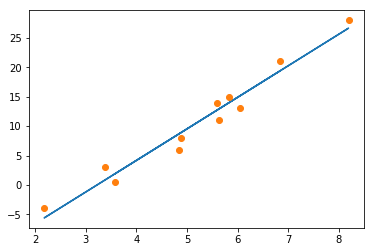

In [102]:
from matplotlib import pyplot as plt

plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')

In [103]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 7,  2,  1,  3,  8,  0,  5,  6, 10]), tensor([9, 4]))

In [105]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

In [106]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

nepochs = 5000
learning_rate = 1e-2

optimizer = optim.SGD([params], lr=learning_rate)

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_un_val, *params)
    loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

t_p = model(t_un, *params)

params

Epoch 0, Training loss 89.636589, Validation loss 38.639244
Epoch 1, Training loss 44.926880, Validation loss 2.545443
Epoch 2, Training loss 37.123985, Validation loss 0.556166
Epoch 3, Training loss 35.668991, Validation loss 1.966753
Epoch 4, Training loss 35.306217, Validation loss 2.938725
Epoch 5, Training loss 35.131748, Validation loss 3.410529
Epoch 6, Training loss 34.990128, Validation loss 3.620039
Epoch 7, Training loss 34.854614, Validation loss 3.711267
Epoch 8, Training loss 34.720608, Validation loss 3.751791
Epoch 9, Training loss 34.587326, Validation loss 3.770980
Epoch 10, Training loss 34.454620, Validation loss 3.781280
Epoch 11, Training loss 34.322464, Validation loss 3.787878
Epoch 12, Training loss 34.190853, Validation loss 3.792933
Epoch 13, Training loss 34.059795, Validation loss 3.797347
Epoch 14, Training loss 33.929268, Validation loss 3.801498
Epoch 15, Training loss 33.799282, Validation loss 3.805542
Epoch 16, Training loss 33.669830, Validation los

Epoch 363, Training loss 9.868852, Validation loss 5.011578
Epoch 364, Training loss 9.838148, Validation loss 5.014381
Epoch 365, Training loss 9.807575, Validation loss 5.017183
Epoch 366, Training loss 9.777126, Validation loss 5.019975
Epoch 367, Training loss 9.746805, Validation loss 5.022760
Epoch 368, Training loss 9.716602, Validation loss 5.025547
Epoch 369, Training loss 9.686527, Validation loss 5.028328
Epoch 370, Training loss 9.656579, Validation loss 5.031111
Epoch 371, Training loss 9.626751, Validation loss 5.033892
Epoch 372, Training loss 9.597053, Validation loss 5.036658
Epoch 373, Training loss 9.567469, Validation loss 5.039417
Epoch 374, Training loss 9.538012, Validation loss 5.042183
Epoch 375, Training loss 9.508677, Validation loss 5.044938
Epoch 376, Training loss 9.479460, Validation loss 5.047704
Epoch 377, Training loss 9.450366, Validation loss 5.050450
Epoch 378, Training loss 9.421391, Validation loss 5.053199
Epoch 379, Training loss 9.392537, Valid

Epoch 772, Training loss 3.799846, Validation loss 5.851369
Epoch 773, Training loss 3.794189, Validation loss 5.852777
Epoch 774, Training loss 3.788556, Validation loss 5.854182
Epoch 775, Training loss 3.782944, Validation loss 5.855582
Epoch 776, Training loss 3.777354, Validation loss 5.856974
Epoch 777, Training loss 3.771790, Validation loss 5.858370
Epoch 778, Training loss 3.766248, Validation loss 5.859762
Epoch 779, Training loss 3.760728, Validation loss 5.861158
Epoch 780, Training loss 3.755230, Validation loss 5.862546
Epoch 781, Training loss 3.749756, Validation loss 5.863925
Epoch 782, Training loss 3.744306, Validation loss 5.865318
Epoch 783, Training loss 3.738876, Validation loss 5.866693
Epoch 784, Training loss 3.733468, Validation loss 5.868069
Epoch 785, Training loss 3.728086, Validation loss 5.869444
Epoch 786, Training loss 3.722723, Validation loss 5.870825
Epoch 787, Training loss 3.717381, Validation loss 5.872201
Epoch 788, Training loss 3.712066, Valid

Epoch 1135, Training loss 2.734287, Validation loss 6.221161
Epoch 1136, Training loss 2.733026, Validation loss 6.221871
Epoch 1137, Training loss 2.731770, Validation loss 6.222568
Epoch 1138, Training loss 2.730519, Validation loss 6.223259
Epoch 1139, Training loss 2.729275, Validation loss 6.223970
Epoch 1140, Training loss 2.728032, Validation loss 6.224667
Epoch 1141, Training loss 2.726798, Validation loss 6.225358
Epoch 1142, Training loss 2.725568, Validation loss 6.226059
Epoch 1143, Training loss 2.724341, Validation loss 6.226756
Epoch 1144, Training loss 2.723122, Validation loss 6.227438
Epoch 1145, Training loss 2.721906, Validation loss 6.228120
Epoch 1146, Training loss 2.720696, Validation loss 6.228807
Epoch 1147, Training loss 2.719491, Validation loss 6.229499
Epoch 1148, Training loss 2.718291, Validation loss 6.230196
Epoch 1149, Training loss 2.717095, Validation loss 6.230874
Epoch 1150, Training loss 2.715905, Validation loss 6.231552
Epoch 1151, Training los

Epoch 1401, Training loss 2.530386, Validation loss 6.366461
Epoch 1402, Training loss 2.529966, Validation loss 6.366873
Epoch 1403, Training loss 2.529548, Validation loss 6.367300
Epoch 1404, Training loss 2.529131, Validation loss 6.367712
Epoch 1405, Training loss 2.528717, Validation loss 6.368114
Epoch 1406, Training loss 2.528303, Validation loss 6.368523
Epoch 1407, Training loss 2.527892, Validation loss 6.368930
Epoch 1408, Training loss 2.527482, Validation loss 6.369352
Epoch 1409, Training loss 2.527074, Validation loss 6.369760
Epoch 1410, Training loss 2.526669, Validation loss 6.370152
Epoch 1411, Training loss 2.526264, Validation loss 6.370556
Epoch 1412, Training loss 2.525861, Validation loss 6.370963
Epoch 1413, Training loss 2.525460, Validation loss 6.371370
Epoch 1414, Training loss 2.525060, Validation loss 6.371788
Epoch 1415, Training loss 2.524662, Validation loss 6.372171
Epoch 1416, Training loss 2.524266, Validation loss 6.372588
Epoch 1417, Training los

Epoch 1782, Training loss 2.449687, Validation loss 6.476420
Epoch 1783, Training loss 2.449600, Validation loss 6.476597
Epoch 1784, Training loss 2.449513, Validation loss 6.476799
Epoch 1785, Training loss 2.449428, Validation loss 6.476980
Epoch 1786, Training loss 2.449342, Validation loss 6.477171
Epoch 1787, Training loss 2.449258, Validation loss 6.477364
Epoch 1788, Training loss 2.449172, Validation loss 6.477550
Epoch 1789, Training loss 2.449087, Validation loss 6.477751
Epoch 1790, Training loss 2.449003, Validation loss 6.477938
Epoch 1791, Training loss 2.448919, Validation loss 6.478125
Epoch 1792, Training loss 2.448835, Validation loss 6.478292
Epoch 1793, Training loss 2.448751, Validation loss 6.478474
Epoch 1794, Training loss 2.448670, Validation loss 6.478670
Epoch 1795, Training loss 2.448586, Validation loss 6.478861
Epoch 1796, Training loss 2.448503, Validation loss 6.479043
Epoch 1797, Training loss 2.448421, Validation loss 6.479219
Epoch 1798, Training los

Epoch 2222, Training loss 2.432044, Validation loss 6.531830
Epoch 2223, Training loss 2.432030, Validation loss 6.531912
Epoch 2224, Training loss 2.432017, Validation loss 6.531998
Epoch 2225, Training loss 2.432002, Validation loss 6.532059
Epoch 2226, Training loss 2.431988, Validation loss 6.532135
Epoch 2227, Training loss 2.431975, Validation loss 6.532211
Epoch 2228, Training loss 2.431960, Validation loss 6.532288
Epoch 2229, Training loss 2.431948, Validation loss 6.532364
Epoch 2230, Training loss 2.431933, Validation loss 6.532445
Epoch 2231, Training loss 2.431920, Validation loss 6.532521
Epoch 2232, Training loss 2.431907, Validation loss 6.532598
Epoch 2233, Training loss 2.431893, Validation loss 6.532673
Epoch 2234, Training loss 2.431880, Validation loss 6.532754
Epoch 2235, Training loss 2.431867, Validation loss 6.532836
Epoch 2236, Training loss 2.431853, Validation loss 6.532897
Epoch 2237, Training loss 2.431840, Validation loss 6.532973
Epoch 2238, Training los

Epoch 2639, Training loss 2.429240, Validation loss 6.553535
Epoch 2640, Training loss 2.429237, Validation loss 6.553550
Epoch 2641, Training loss 2.429234, Validation loss 6.553580
Epoch 2642, Training loss 2.429232, Validation loss 6.553617
Epoch 2643, Training loss 2.429229, Validation loss 6.553657
Epoch 2644, Training loss 2.429227, Validation loss 6.553687
Epoch 2645, Training loss 2.429225, Validation loss 6.553708
Epoch 2646, Training loss 2.429222, Validation loss 6.553748
Epoch 2647, Training loss 2.429220, Validation loss 6.553769
Epoch 2648, Training loss 2.429217, Validation loss 6.553815
Epoch 2649, Training loss 2.429214, Validation loss 6.553850
Epoch 2650, Training loss 2.429212, Validation loss 6.553881
Epoch 2651, Training loss 2.429209, Validation loss 6.553911
Epoch 2652, Training loss 2.429208, Validation loss 6.553942
Epoch 2653, Training loss 2.429205, Validation loss 6.553977
Epoch 2654, Training loss 2.429203, Validation loss 6.553999
Epoch 2655, Training los

Epoch 2944, Training loss 2.428803, Validation loss 6.560945
Epoch 2945, Training loss 2.428803, Validation loss 6.560955
Epoch 2946, Training loss 2.428802, Validation loss 6.560990
Epoch 2947, Training loss 2.428802, Validation loss 6.561020
Epoch 2948, Training loss 2.428801, Validation loss 6.561021
Epoch 2949, Training loss 2.428799, Validation loss 6.561047
Epoch 2950, Training loss 2.428799, Validation loss 6.561051
Epoch 2951, Training loss 2.428798, Validation loss 6.561077
Epoch 2952, Training loss 2.428798, Validation loss 6.561077
Epoch 2953, Training loss 2.428797, Validation loss 6.561108
Epoch 2954, Training loss 2.428797, Validation loss 6.561128
Epoch 2955, Training loss 2.428797, Validation loss 6.561138
Epoch 2956, Training loss 2.428794, Validation loss 6.561158
Epoch 2957, Training loss 2.428794, Validation loss 6.561179
Epoch 2958, Training loss 2.428794, Validation loss 6.561189
Epoch 2959, Training loss 2.428792, Validation loss 6.561210
Epoch 2960, Training los

Epoch 3133, Training loss 2.428710, Validation loss 6.563679
Epoch 3134, Training loss 2.428709, Validation loss 6.563703
Epoch 3135, Training loss 2.428710, Validation loss 6.563723
Epoch 3136, Training loss 2.428708, Validation loss 6.563738
Epoch 3137, Training loss 2.428708, Validation loss 6.563739
Epoch 3138, Training loss 2.428708, Validation loss 6.563759
Epoch 3139, Training loss 2.428708, Validation loss 6.563759
Epoch 3140, Training loss 2.428708, Validation loss 6.563779
Epoch 3141, Training loss 2.428708, Validation loss 6.563780
Epoch 3142, Training loss 2.428707, Validation loss 6.563795
Epoch 3143, Training loss 2.428706, Validation loss 6.563796
Epoch 3144, Training loss 2.428707, Validation loss 6.563816
Epoch 3145, Training loss 2.428706, Validation loss 6.563836
Epoch 3146, Training loss 2.428706, Validation loss 6.563836
Epoch 3147, Training loss 2.428706, Validation loss 6.563851
Epoch 3148, Training loss 2.428706, Validation loss 6.563852
Epoch 3149, Training los

Epoch 3410, Training loss 2.428657, Validation loss 6.566188
Epoch 3411, Training loss 2.428655, Validation loss 6.566188
Epoch 3412, Training loss 2.428656, Validation loss 6.566193
Epoch 3413, Training loss 2.428656, Validation loss 6.566198
Epoch 3414, Training loss 2.428656, Validation loss 6.566203
Epoch 3415, Training loss 2.428655, Validation loss 6.566218
Epoch 3416, Training loss 2.428655, Validation loss 6.566233
Epoch 3417, Training loss 2.428655, Validation loss 6.566229
Epoch 3418, Training loss 2.428656, Validation loss 6.566243
Epoch 3419, Training loss 2.428655, Validation loss 6.566254
Epoch 3420, Training loss 2.428654, Validation loss 6.566249
Epoch 3421, Training loss 2.428655, Validation loss 6.566264
Epoch 3422, Training loss 2.428655, Validation loss 6.566264
Epoch 3423, Training loss 2.428654, Validation loss 6.566269
Epoch 3424, Training loss 2.428654, Validation loss 6.566284
Epoch 3425, Training loss 2.428654, Validation loss 6.566279
Epoch 3426, Training los

Epoch 3807, Training loss 2.428637, Validation loss 6.567994
Epoch 3808, Training loss 2.428636, Validation loss 6.567999
Epoch 3809, Training loss 2.428636, Validation loss 6.568004
Epoch 3810, Training loss 2.428636, Validation loss 6.568009
Epoch 3811, Training loss 2.428637, Validation loss 6.568004
Epoch 3812, Training loss 2.428636, Validation loss 6.568009
Epoch 3813, Training loss 2.428636, Validation loss 6.568014
Epoch 3814, Training loss 2.428635, Validation loss 6.568019
Epoch 3815, Training loss 2.428636, Validation loss 6.568025
Epoch 3816, Training loss 2.428636, Validation loss 6.568024
Epoch 3817, Training loss 2.428636, Validation loss 6.568029
Epoch 3818, Training loss 2.428636, Validation loss 6.568034
Epoch 3819, Training loss 2.428634, Validation loss 6.568039
Epoch 3820, Training loss 2.428635, Validation loss 6.568034
Epoch 3821, Training loss 2.428635, Validation loss 6.568039
Epoch 3822, Training loss 2.428635, Validation loss 6.568045
Epoch 3823, Training los

Epoch 4145, Training loss 2.428632, Validation loss 6.568694
Epoch 4146, Training loss 2.428632, Validation loss 6.568698
Epoch 4147, Training loss 2.428632, Validation loss 6.568698
Epoch 4148, Training loss 2.428632, Validation loss 6.568708
Epoch 4149, Training loss 2.428632, Validation loss 6.568708
Epoch 4150, Training loss 2.428632, Validation loss 6.568713
Epoch 4151, Training loss 2.428632, Validation loss 6.568713
Epoch 4152, Training loss 2.428632, Validation loss 6.568708
Epoch 4153, Training loss 2.428632, Validation loss 6.568708
Epoch 4154, Training loss 2.428632, Validation loss 6.568719
Epoch 4155, Training loss 2.428634, Validation loss 6.568719
Epoch 4156, Training loss 2.428632, Validation loss 6.568724
Epoch 4157, Training loss 2.428632, Validation loss 6.568724
Epoch 4158, Training loss 2.428633, Validation loss 6.568734
Epoch 4159, Training loss 2.428631, Validation loss 6.568719
Epoch 4160, Training loss 2.428633, Validation loss 6.568719
Epoch 4161, Training los

Epoch 4307, Training loss 2.428632, Validation loss 6.568893
Epoch 4308, Training loss 2.428631, Validation loss 6.568903
Epoch 4309, Training loss 2.428631, Validation loss 6.568898
Epoch 4310, Training loss 2.428632, Validation loss 6.568903
Epoch 4311, Training loss 2.428632, Validation loss 6.568898
Epoch 4312, Training loss 2.428632, Validation loss 6.568903
Epoch 4313, Training loss 2.428632, Validation loss 6.568903
Epoch 4314, Training loss 2.428630, Validation loss 6.568898
Epoch 4315, Training loss 2.428632, Validation loss 6.568903
Epoch 4316, Training loss 2.428631, Validation loss 6.568913
Epoch 4317, Training loss 2.428631, Validation loss 6.568908
Epoch 4318, Training loss 2.428631, Validation loss 6.568913
Epoch 4319, Training loss 2.428631, Validation loss 6.568908
Epoch 4320, Training loss 2.428631, Validation loss 6.568913
Epoch 4321, Training loss 2.428632, Validation loss 6.568913
Epoch 4322, Training loss 2.428631, Validation loss 6.568918
Epoch 4323, Training los

Epoch 4598, Training loss 2.428632, Validation loss 6.569142
Epoch 4599, Training loss 2.428631, Validation loss 6.569147
Epoch 4600, Training loss 2.428631, Validation loss 6.569147
Epoch 4601, Training loss 2.428631, Validation loss 6.569137
Epoch 4602, Training loss 2.428631, Validation loss 6.569142
Epoch 4603, Training loss 2.428632, Validation loss 6.569152
Epoch 4604, Training loss 2.428632, Validation loss 6.569157
Epoch 4605, Training loss 2.428631, Validation loss 6.569147
Epoch 4606, Training loss 2.428632, Validation loss 6.569152
Epoch 4607, Training loss 2.428631, Validation loss 6.569152
Epoch 4608, Training loss 2.428630, Validation loss 6.569157
Epoch 4609, Training loss 2.428630, Validation loss 6.569147
Epoch 4610, Training loss 2.428631, Validation loss 6.569157
Epoch 4611, Training loss 2.428632, Validation loss 6.569162
Epoch 4612, Training loss 2.428632, Validation loss 6.569152
Epoch 4613, Training loss 2.428632, Validation loss 6.569152
Epoch 4614, Training los

tensor([  5.4878, -17.4613], requires_grad=True)

In [107]:
for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train, *params)
    loss_train = loss_fn(t_p_train, t_c_train)

    with torch.no_grad():
        t_p_val = model(t_un_val, *params)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

Epoch 0, Training loss 2.428631, Validation loss 6.569300
Epoch 1, Training loss 2.428631, Validation loss 6.569291
Epoch 2, Training loss 2.428630, Validation loss 6.569296
Epoch 3, Training loss 2.428630, Validation loss 6.569291
Epoch 4, Training loss 2.428630, Validation loss 6.569281
Epoch 5, Training loss 2.428630, Validation loss 6.569291
Epoch 6, Training loss 2.428632, Validation loss 6.569296
Epoch 7, Training loss 2.428631, Validation loss 6.569305
Epoch 8, Training loss 2.428631, Validation loss 6.569296
Epoch 9, Training loss 2.428631, Validation loss 6.569291
Epoch 10, Training loss 2.428630, Validation loss 6.569296
Epoch 11, Training loss 2.428631, Validation loss 6.569286
Epoch 12, Training loss 2.428631, Validation loss 6.569296
Epoch 13, Training loss 2.428631, Validation loss 6.569301
Epoch 14, Training loss 2.428630, Validation loss 6.569291
Epoch 15, Training loss 2.428631, Validation loss 6.569291
Epoch 16, Training loss 2.428630, Validation loss 6.569296
Epoch 1

Epoch 373, Training loss 2.428630, Validation loss 6.569311
Epoch 374, Training loss 2.428630, Validation loss 6.569311
Epoch 375, Training loss 2.428630, Validation loss 6.569311
Epoch 376, Training loss 2.428630, Validation loss 6.569311
Epoch 377, Training loss 2.428630, Validation loss 6.569311
Epoch 378, Training loss 2.428630, Validation loss 6.569311
Epoch 379, Training loss 2.428630, Validation loss 6.569311
Epoch 380, Training loss 2.428630, Validation loss 6.569311
Epoch 381, Training loss 2.428630, Validation loss 6.569311
Epoch 382, Training loss 2.428630, Validation loss 6.569311
Epoch 383, Training loss 2.428630, Validation loss 6.569311
Epoch 384, Training loss 2.428630, Validation loss 6.569311
Epoch 385, Training loss 2.428630, Validation loss 6.569311
Epoch 386, Training loss 2.428630, Validation loss 6.569311
Epoch 387, Training loss 2.428630, Validation loss 6.569311
Epoch 388, Training loss 2.428630, Validation loss 6.569311
Epoch 389, Training loss 2.428630, Valid

Epoch 728, Training loss 2.428630, Validation loss 6.569311
Epoch 729, Training loss 2.428630, Validation loss 6.569311
Epoch 730, Training loss 2.428630, Validation loss 6.569311
Epoch 731, Training loss 2.428630, Validation loss 6.569311
Epoch 732, Training loss 2.428630, Validation loss 6.569311
Epoch 733, Training loss 2.428630, Validation loss 6.569311
Epoch 734, Training loss 2.428630, Validation loss 6.569311
Epoch 735, Training loss 2.428630, Validation loss 6.569311
Epoch 736, Training loss 2.428630, Validation loss 6.569311
Epoch 737, Training loss 2.428630, Validation loss 6.569311
Epoch 738, Training loss 2.428630, Validation loss 6.569311
Epoch 739, Training loss 2.428630, Validation loss 6.569311
Epoch 740, Training loss 2.428630, Validation loss 6.569311
Epoch 741, Training loss 2.428630, Validation loss 6.569311
Epoch 742, Training loss 2.428630, Validation loss 6.569311
Epoch 743, Training loss 2.428630, Validation loss 6.569311
Epoch 744, Training loss 2.428630, Valid

Epoch 1088, Training loss 2.428630, Validation loss 6.569311
Epoch 1089, Training loss 2.428630, Validation loss 6.569311
Epoch 1090, Training loss 2.428630, Validation loss 6.569311
Epoch 1091, Training loss 2.428630, Validation loss 6.569311
Epoch 1092, Training loss 2.428630, Validation loss 6.569311
Epoch 1093, Training loss 2.428630, Validation loss 6.569311
Epoch 1094, Training loss 2.428630, Validation loss 6.569311
Epoch 1095, Training loss 2.428630, Validation loss 6.569311
Epoch 1096, Training loss 2.428630, Validation loss 6.569311
Epoch 1097, Training loss 2.428630, Validation loss 6.569311
Epoch 1098, Training loss 2.428630, Validation loss 6.569311
Epoch 1099, Training loss 2.428630, Validation loss 6.569311
Epoch 1100, Training loss 2.428630, Validation loss 6.569311
Epoch 1101, Training loss 2.428630, Validation loss 6.569311
Epoch 1102, Training loss 2.428630, Validation loss 6.569311
Epoch 1103, Training loss 2.428630, Validation loss 6.569311
Epoch 1104, Training los

Epoch 1485, Training loss 2.428630, Validation loss 6.569311
Epoch 1486, Training loss 2.428630, Validation loss 6.569311
Epoch 1487, Training loss 2.428630, Validation loss 6.569311
Epoch 1488, Training loss 2.428630, Validation loss 6.569311
Epoch 1489, Training loss 2.428630, Validation loss 6.569311
Epoch 1490, Training loss 2.428630, Validation loss 6.569311
Epoch 1491, Training loss 2.428630, Validation loss 6.569311
Epoch 1492, Training loss 2.428630, Validation loss 6.569311
Epoch 1493, Training loss 2.428630, Validation loss 6.569311
Epoch 1494, Training loss 2.428630, Validation loss 6.569311
Epoch 1495, Training loss 2.428630, Validation loss 6.569311
Epoch 1496, Training loss 2.428630, Validation loss 6.569311
Epoch 1497, Training loss 2.428630, Validation loss 6.569311
Epoch 1498, Training loss 2.428630, Validation loss 6.569311
Epoch 1499, Training loss 2.428630, Validation loss 6.569311
Epoch 1500, Training loss 2.428630, Validation loss 6.569311
Epoch 1501, Training los

Epoch 1819, Training loss 2.428630, Validation loss 6.569311
Epoch 1820, Training loss 2.428630, Validation loss 6.569311
Epoch 1821, Training loss 2.428630, Validation loss 6.569311
Epoch 1822, Training loss 2.428630, Validation loss 6.569311
Epoch 1823, Training loss 2.428630, Validation loss 6.569311
Epoch 1824, Training loss 2.428630, Validation loss 6.569311
Epoch 1825, Training loss 2.428630, Validation loss 6.569311
Epoch 1826, Training loss 2.428630, Validation loss 6.569311
Epoch 1827, Training loss 2.428630, Validation loss 6.569311
Epoch 1828, Training loss 2.428630, Validation loss 6.569311
Epoch 1829, Training loss 2.428630, Validation loss 6.569311
Epoch 1830, Training loss 2.428630, Validation loss 6.569311
Epoch 1831, Training loss 2.428630, Validation loss 6.569311
Epoch 1832, Training loss 2.428630, Validation loss 6.569311
Epoch 1833, Training loss 2.428630, Validation loss 6.569311
Epoch 1834, Training loss 2.428630, Validation loss 6.569311
Epoch 1835, Training los

Epoch 2159, Training loss 2.428630, Validation loss 6.569311
Epoch 2160, Training loss 2.428630, Validation loss 6.569311
Epoch 2161, Training loss 2.428630, Validation loss 6.569311
Epoch 2162, Training loss 2.428630, Validation loss 6.569311
Epoch 2163, Training loss 2.428630, Validation loss 6.569311
Epoch 2164, Training loss 2.428630, Validation loss 6.569311
Epoch 2165, Training loss 2.428630, Validation loss 6.569311
Epoch 2166, Training loss 2.428630, Validation loss 6.569311
Epoch 2167, Training loss 2.428630, Validation loss 6.569311
Epoch 2168, Training loss 2.428630, Validation loss 6.569311
Epoch 2169, Training loss 2.428630, Validation loss 6.569311
Epoch 2170, Training loss 2.428630, Validation loss 6.569311
Epoch 2171, Training loss 2.428630, Validation loss 6.569311
Epoch 2172, Training loss 2.428630, Validation loss 6.569311
Epoch 2173, Training loss 2.428630, Validation loss 6.569311
Epoch 2174, Training loss 2.428630, Validation loss 6.569311
Epoch 2175, Training los

Epoch 2553, Training loss 2.428630, Validation loss 6.569311
Epoch 2554, Training loss 2.428630, Validation loss 6.569311
Epoch 2555, Training loss 2.428630, Validation loss 6.569311
Epoch 2556, Training loss 2.428630, Validation loss 6.569311
Epoch 2557, Training loss 2.428630, Validation loss 6.569311
Epoch 2558, Training loss 2.428630, Validation loss 6.569311
Epoch 2559, Training loss 2.428630, Validation loss 6.569311
Epoch 2560, Training loss 2.428630, Validation loss 6.569311
Epoch 2561, Training loss 2.428630, Validation loss 6.569311
Epoch 2562, Training loss 2.428630, Validation loss 6.569311
Epoch 2563, Training loss 2.428630, Validation loss 6.569311
Epoch 2564, Training loss 2.428630, Validation loss 6.569311
Epoch 2565, Training loss 2.428630, Validation loss 6.569311
Epoch 2566, Training loss 2.428630, Validation loss 6.569311
Epoch 2567, Training loss 2.428630, Validation loss 6.569311
Epoch 2568, Training loss 2.428630, Validation loss 6.569311
Epoch 2569, Training los

Epoch 2815, Training loss 2.428630, Validation loss 6.569311
Epoch 2816, Training loss 2.428630, Validation loss 6.569311
Epoch 2817, Training loss 2.428630, Validation loss 6.569311
Epoch 2818, Training loss 2.428630, Validation loss 6.569311
Epoch 2819, Training loss 2.428630, Validation loss 6.569311
Epoch 2820, Training loss 2.428630, Validation loss 6.569311
Epoch 2821, Training loss 2.428630, Validation loss 6.569311
Epoch 2822, Training loss 2.428630, Validation loss 6.569311
Epoch 2823, Training loss 2.428630, Validation loss 6.569311
Epoch 2824, Training loss 2.428630, Validation loss 6.569311
Epoch 2825, Training loss 2.428630, Validation loss 6.569311
Epoch 2826, Training loss 2.428630, Validation loss 6.569311
Epoch 2827, Training loss 2.428630, Validation loss 6.569311
Epoch 2828, Training loss 2.428630, Validation loss 6.569311
Epoch 2829, Training loss 2.428630, Validation loss 6.569311
Epoch 2830, Training loss 2.428630, Validation loss 6.569311
Epoch 2831, Training los

Epoch 3001, Training loss 2.428630, Validation loss 6.569311
Epoch 3002, Training loss 2.428630, Validation loss 6.569311
Epoch 3003, Training loss 2.428630, Validation loss 6.569311
Epoch 3004, Training loss 2.428630, Validation loss 6.569311
Epoch 3005, Training loss 2.428630, Validation loss 6.569311
Epoch 3006, Training loss 2.428630, Validation loss 6.569311
Epoch 3007, Training loss 2.428630, Validation loss 6.569311
Epoch 3008, Training loss 2.428630, Validation loss 6.569311
Epoch 3009, Training loss 2.428630, Validation loss 6.569311
Epoch 3010, Training loss 2.428630, Validation loss 6.569311
Epoch 3011, Training loss 2.428630, Validation loss 6.569311
Epoch 3012, Training loss 2.428630, Validation loss 6.569311
Epoch 3013, Training loss 2.428630, Validation loss 6.569311
Epoch 3014, Training loss 2.428630, Validation loss 6.569311
Epoch 3015, Training loss 2.428630, Validation loss 6.569311
Epoch 3016, Training loss 2.428630, Validation loss 6.569311
Epoch 3017, Training los

Epoch 3190, Training loss 2.428630, Validation loss 6.569311
Epoch 3191, Training loss 2.428630, Validation loss 6.569311
Epoch 3192, Training loss 2.428630, Validation loss 6.569311
Epoch 3193, Training loss 2.428630, Validation loss 6.569311
Epoch 3194, Training loss 2.428630, Validation loss 6.569311
Epoch 3195, Training loss 2.428630, Validation loss 6.569311
Epoch 3196, Training loss 2.428630, Validation loss 6.569311
Epoch 3197, Training loss 2.428630, Validation loss 6.569311
Epoch 3198, Training loss 2.428630, Validation loss 6.569311
Epoch 3199, Training loss 2.428630, Validation loss 6.569311
Epoch 3200, Training loss 2.428630, Validation loss 6.569311
Epoch 3201, Training loss 2.428630, Validation loss 6.569311
Epoch 3202, Training loss 2.428630, Validation loss 6.569311
Epoch 3203, Training loss 2.428630, Validation loss 6.569311
Epoch 3204, Training loss 2.428630, Validation loss 6.569311
Epoch 3205, Training loss 2.428630, Validation loss 6.569311
Epoch 3206, Training los

Epoch 3408, Training loss 2.428630, Validation loss 6.569311
Epoch 3409, Training loss 2.428630, Validation loss 6.569311
Epoch 3410, Training loss 2.428630, Validation loss 6.569311
Epoch 3411, Training loss 2.428630, Validation loss 6.569311
Epoch 3412, Training loss 2.428630, Validation loss 6.569311
Epoch 3413, Training loss 2.428630, Validation loss 6.569311
Epoch 3414, Training loss 2.428630, Validation loss 6.569311
Epoch 3415, Training loss 2.428630, Validation loss 6.569311
Epoch 3416, Training loss 2.428630, Validation loss 6.569311
Epoch 3417, Training loss 2.428630, Validation loss 6.569311
Epoch 3418, Training loss 2.428630, Validation loss 6.569311
Epoch 3419, Training loss 2.428630, Validation loss 6.569311
Epoch 3420, Training loss 2.428630, Validation loss 6.569311
Epoch 3421, Training loss 2.428630, Validation loss 6.569311
Epoch 3422, Training loss 2.428630, Validation loss 6.569311
Epoch 3423, Training loss 2.428630, Validation loss 6.569311
Epoch 3424, Training los

Epoch 3848, Training loss 2.428630, Validation loss 6.569311
Epoch 3849, Training loss 2.428630, Validation loss 6.569311
Epoch 3850, Training loss 2.428630, Validation loss 6.569311
Epoch 3851, Training loss 2.428630, Validation loss 6.569311
Epoch 3852, Training loss 2.428630, Validation loss 6.569311
Epoch 3853, Training loss 2.428630, Validation loss 6.569311
Epoch 3854, Training loss 2.428630, Validation loss 6.569311
Epoch 3855, Training loss 2.428630, Validation loss 6.569311
Epoch 3856, Training loss 2.428630, Validation loss 6.569311
Epoch 3857, Training loss 2.428630, Validation loss 6.569311
Epoch 3858, Training loss 2.428630, Validation loss 6.569311
Epoch 3859, Training loss 2.428630, Validation loss 6.569311
Epoch 3860, Training loss 2.428630, Validation loss 6.569311
Epoch 3861, Training loss 2.428630, Validation loss 6.569311
Epoch 3862, Training loss 2.428630, Validation loss 6.569311
Epoch 3863, Training loss 2.428630, Validation loss 6.569311
Epoch 3864, Training los

Epoch 4291, Training loss 2.428630, Validation loss 6.569311
Epoch 4292, Training loss 2.428630, Validation loss 6.569311
Epoch 4293, Training loss 2.428630, Validation loss 6.569311
Epoch 4294, Training loss 2.428630, Validation loss 6.569311
Epoch 4295, Training loss 2.428630, Validation loss 6.569311
Epoch 4296, Training loss 2.428630, Validation loss 6.569311
Epoch 4297, Training loss 2.428630, Validation loss 6.569311
Epoch 4298, Training loss 2.428630, Validation loss 6.569311
Epoch 4299, Training loss 2.428630, Validation loss 6.569311
Epoch 4300, Training loss 2.428630, Validation loss 6.569311
Epoch 4301, Training loss 2.428630, Validation loss 6.569311
Epoch 4302, Training loss 2.428630, Validation loss 6.569311
Epoch 4303, Training loss 2.428630, Validation loss 6.569311
Epoch 4304, Training loss 2.428630, Validation loss 6.569311
Epoch 4305, Training loss 2.428630, Validation loss 6.569311
Epoch 4306, Training loss 2.428630, Validation loss 6.569311
Epoch 4307, Training los

Epoch 4738, Training loss 2.428630, Validation loss 6.569311
Epoch 4739, Training loss 2.428630, Validation loss 6.569311
Epoch 4740, Training loss 2.428630, Validation loss 6.569311
Epoch 4741, Training loss 2.428630, Validation loss 6.569311
Epoch 4742, Training loss 2.428630, Validation loss 6.569311
Epoch 4743, Training loss 2.428630, Validation loss 6.569311
Epoch 4744, Training loss 2.428630, Validation loss 6.569311
Epoch 4745, Training loss 2.428630, Validation loss 6.569311
Epoch 4746, Training loss 2.428630, Validation loss 6.569311
Epoch 4747, Training loss 2.428630, Validation loss 6.569311
Epoch 4748, Training loss 2.428630, Validation loss 6.569311
Epoch 4749, Training loss 2.428630, Validation loss 6.569311
Epoch 4750, Training loss 2.428630, Validation loss 6.569311
Epoch 4751, Training loss 2.428630, Validation loss 6.569311
Epoch 4752, Training loss 2.428630, Validation loss 6.569311
Epoch 4753, Training loss 2.428630, Validation loss 6.569311
Epoch 4754, Training los

In [108]:
for epoch in range(nepochs):
    # ...
    print(loss_val.requires_grad)  # prints False
    # ...

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [109]:
def forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

In [110]:
import torch
import torch.nn as nn

model = nn.Linear(1, 1) # We'll look into the arguments in a minute

In [111]:
y = model.forward(x)  # DON'T DO THIS
y = model(x)          # DO THIS

NameError: name 'x' is not defined

In [113]:
model.weight

Parameter containing:
tensor([[0.8208]], requires_grad=True)

In [114]:
x = torch.ones(1)

model(x)

tensor([0.7944], grad_fn=<AddBackward0>)

In [115]:
x = torch.ones(10, 1)

model(x)

tensor([[0.7944],
        [0.7944],
        [0.7944],
        [0.7944],
        [0.7944],
        [0.7944],
        [0.7944],
        [0.7944],
        [0.7944],
        [0.7944]], grad_fn=<ThAddmmBackward>)

In [116]:
t_u = torch.unsqueeze(t_u, 1)
t_c = torch.unsqueeze(t_c, 1)

In [117]:
model = nn.Linear(1, 1)

In [118]:
model.parameters()

<generator object Module.parameters at 0x116081f10>

In [121]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6506]], requires_grad=True), Parameter containing:
 tensor([0.7924], requires_grad=True)]

In [122]:
model = nn.Linear(1, 1)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [123]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [124]:
for epoch in range(nepochs):
    
    # forward pass
    t_p_train = model(t_un_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    with torch.no_grad():
        t_p_val = model(t_un_val)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()

Epoch 0, Training loss 377.888733, Validation loss 340.187164
Epoch 1, Training loss 93.240906, Validation loss 43.281433
Epoch 2, Training loss 44.177326, Validation loss 2.966456
Epoch 3, Training loss 35.631279, Validation loss 0.495764
Epoch 4, Training loss 34.054108, Validation loss 1.925004
Epoch 5, Training loss 33.675919, Validation loss 2.942267
Epoch 6, Training loss 33.504379, Validation loss 3.439312
Epoch 7, Training loss 33.368816, Validation loss 3.660394
Epoch 8, Training loss 33.239883, Validation loss 3.756605
Epoch 9, Training loss 33.112530, Validation loss 3.799221
Epoch 10, Training loss 32.985870, Validation loss 3.819282
Epoch 11, Training loss 32.859776, Validation loss 3.829930
Epoch 12, Training loss 32.734207, Validation loss 3.836667
Epoch 13, Training loss 32.609146, Validation loss 3.841775
Epoch 14, Training loss 32.484612, Validation loss 3.846200
Epoch 15, Training loss 32.360588, Validation loss 3.850352
Epoch 16, Training loss 32.237076, Validation 

Epoch 307, Training loss 11.377375, Validation loss 4.882258
Epoch 308, Training loss 11.340446, Validation loss 4.885246
Epoch 309, Training loss 11.303672, Validation loss 4.888228
Epoch 310, Training loss 11.267049, Validation loss 4.891205
Epoch 311, Training loss 11.230578, Validation loss 4.894179
Epoch 312, Training loss 11.194256, Validation loss 4.897153
Epoch 313, Training loss 11.158085, Validation loss 4.900112
Epoch 314, Training loss 11.122065, Validation loss 4.903078
Epoch 315, Training loss 11.086187, Validation loss 4.906034
Epoch 316, Training loss 11.050466, Validation loss 4.908988
Epoch 317, Training loss 11.014886, Validation loss 4.911941
Epoch 318, Training loss 10.979456, Validation loss 4.914883
Epoch 319, Training loss 10.944174, Validation loss 4.917824
Epoch 320, Training loss 10.909034, Validation loss 4.920767
Epoch 321, Training loss 10.874042, Validation loss 4.923692
Epoch 322, Training loss 10.839191, Validation loss 4.926623
Epoch 323, Training loss

Epoch 665, Training loss 4.465043, Validation loss 5.704241
Epoch 666, Training loss 4.456642, Validation loss 5.705917
Epoch 667, Training loss 4.448274, Validation loss 5.707585
Epoch 668, Training loss 4.439942, Validation loss 5.709254
Epoch 669, Training loss 4.431640, Validation loss 5.710914
Epoch 670, Training loss 4.423375, Validation loss 5.712574
Epoch 671, Training loss 4.415143, Validation loss 5.714230
Epoch 672, Training loss 4.406946, Validation loss 5.715896
Epoch 673, Training loss 4.398783, Validation loss 5.717544
Epoch 674, Training loss 4.390654, Validation loss 5.719197
Epoch 675, Training loss 4.382559, Validation loss 5.720832
Epoch 676, Training loss 4.374495, Validation loss 5.722482
Epoch 677, Training loss 4.366464, Validation loss 5.724118
Epoch 678, Training loss 4.358469, Validation loss 5.725755
Epoch 679, Training loss 4.350506, Validation loss 5.727397
Epoch 680, Training loss 4.342575, Validation loss 5.729034
Epoch 681, Training loss 4.334678, Valid

Epoch 1053, Training loss 2.837979, Validation loss 6.167898
Epoch 1054, Training loss 2.836289, Validation loss 6.168700
Epoch 1055, Training loss 2.834607, Validation loss 6.169507
Epoch 1056, Training loss 2.832932, Validation loss 6.170314
Epoch 1057, Training loss 2.831265, Validation loss 6.171111
Epoch 1058, Training loss 2.829603, Validation loss 6.171914
Epoch 1059, Training loss 2.827948, Validation loss 6.172721
Epoch 1060, Training loss 2.826300, Validation loss 6.173523
Epoch 1061, Training loss 2.824659, Validation loss 6.174312
Epoch 1062, Training loss 2.823024, Validation loss 6.175100
Epoch 1063, Training loss 2.821397, Validation loss 6.175888
Epoch 1064, Training loss 2.819779, Validation loss 6.176676
Epoch 1065, Training loss 2.818163, Validation loss 6.177474
Epoch 1066, Training loss 2.816555, Validation loss 6.178263
Epoch 1067, Training loss 2.814954, Validation loss 6.179047
Epoch 1068, Training loss 2.813361, Validation loss 6.179831
Epoch 1069, Training los

Epoch 1325, Training loss 2.561565, Validation loss 6.337888
Epoch 1326, Training loss 2.561016, Validation loss 6.338358
Epoch 1327, Training loss 2.560470, Validation loss 6.338833
Epoch 1328, Training loss 2.559926, Validation loss 6.339289
Epoch 1329, Training loss 2.559384, Validation loss 6.339768
Epoch 1330, Training loss 2.558843, Validation loss 6.340234
Epoch 1331, Training loss 2.558306, Validation loss 6.340704
Epoch 1332, Training loss 2.557771, Validation loss 6.341160
Epoch 1333, Training loss 2.557240, Validation loss 6.341639
Epoch 1334, Training loss 2.556708, Validation loss 6.342100
Epoch 1335, Training loss 2.556178, Validation loss 6.342570
Epoch 1336, Training loss 2.555654, Validation loss 6.343026
Epoch 1337, Training loss 2.555128, Validation loss 6.343486
Epoch 1338, Training loss 2.554607, Validation loss 6.343951
Epoch 1339, Training loss 2.554086, Validation loss 6.344412
Epoch 1340, Training loss 2.553570, Validation loss 6.344868
Epoch 1341, Training los

Epoch 1604, Training loss 2.470567, Validation loss 6.438484
Epoch 1605, Training loss 2.470396, Validation loss 6.438754
Epoch 1606, Training loss 2.470223, Validation loss 6.439025
Epoch 1607, Training loss 2.470052, Validation loss 6.439286
Epoch 1608, Training loss 2.469881, Validation loss 6.439552
Epoch 1609, Training loss 2.469710, Validation loss 6.439828
Epoch 1610, Training loss 2.469540, Validation loss 6.440099
Epoch 1611, Training loss 2.469372, Validation loss 6.440354
Epoch 1612, Training loss 2.469203, Validation loss 6.440621
Epoch 1613, Training loss 2.469037, Validation loss 6.440882
Epoch 1614, Training loss 2.468868, Validation loss 6.441148
Epoch 1615, Training loss 2.468703, Validation loss 6.441404
Epoch 1616, Training loss 2.468538, Validation loss 6.441675
Epoch 1617, Training loss 2.468373, Validation loss 6.441926
Epoch 1618, Training loss 2.468210, Validation loss 6.442196
Epoch 1619, Training loss 2.468045, Validation loss 6.442457
Epoch 1620, Training los

Epoch 1936, Training loss 2.439257, Validation loss 6.503217
Epoch 1937, Training loss 2.439214, Validation loss 6.503368
Epoch 1938, Training loss 2.439170, Validation loss 6.503500
Epoch 1939, Training loss 2.439126, Validation loss 6.503632
Epoch 1940, Training loss 2.439083, Validation loss 6.503763
Epoch 1941, Training loss 2.439040, Validation loss 6.503910
Epoch 1942, Training loss 2.438998, Validation loss 6.504046
Epoch 1943, Training loss 2.438954, Validation loss 6.504169
Epoch 1944, Training loss 2.438911, Validation loss 6.504300
Epoch 1945, Training loss 2.438870, Validation loss 6.504441
Epoch 1946, Training loss 2.438827, Validation loss 6.504573
Epoch 1947, Training loss 2.438784, Validation loss 6.504705
Epoch 1948, Training loss 2.438742, Validation loss 6.504841
Epoch 1949, Training loss 2.438702, Validation loss 6.504978
Epoch 1950, Training loss 2.438659, Validation loss 6.505110
Epoch 1951, Training loss 2.438619, Validation loss 6.505251
Epoch 1952, Training los

Epoch 2259, Training loss 2.431426, Validation loss 6.535397
Epoch 2260, Training loss 2.431413, Validation loss 6.535468
Epoch 2261, Training loss 2.431403, Validation loss 6.535539
Epoch 2262, Training loss 2.431392, Validation loss 6.535605
Epoch 2263, Training loss 2.431380, Validation loss 6.535677
Epoch 2264, Training loss 2.431369, Validation loss 6.535743
Epoch 2265, Training loss 2.431358, Validation loss 6.535814
Epoch 2266, Training loss 2.431346, Validation loss 6.535900
Epoch 2267, Training loss 2.431335, Validation loss 6.535956
Epoch 2268, Training loss 2.431324, Validation loss 6.536022
Epoch 2269, Training loss 2.431312, Validation loss 6.536098
Epoch 2270, Training loss 2.431302, Validation loss 6.536160
Epoch 2271, Training loss 2.431292, Validation loss 6.536230
Epoch 2272, Training loss 2.431278, Validation loss 6.536296
Epoch 2273, Training loss 2.431268, Validation loss 6.536363
Epoch 2274, Training loss 2.431257, Validation loss 6.536439
Epoch 2275, Training los

Epoch 2558, Training loss 2.429442, Validation loss 6.551060
Epoch 2559, Training loss 2.429439, Validation loss 6.551100
Epoch 2560, Training loss 2.429436, Validation loss 6.551141
Epoch 2561, Training loss 2.429433, Validation loss 6.551171
Epoch 2562, Training loss 2.429428, Validation loss 6.551217
Epoch 2563, Training loss 2.429426, Validation loss 6.551248
Epoch 2564, Training loss 2.429423, Validation loss 6.551289
Epoch 2565, Training loss 2.429420, Validation loss 6.551344
Epoch 2566, Training loss 2.429417, Validation loss 6.551365
Epoch 2567, Training loss 2.429414, Validation loss 6.551401
Epoch 2568, Training loss 2.429410, Validation loss 6.551436
Epoch 2569, Training loss 2.429406, Validation loss 6.551472
Epoch 2570, Training loss 2.429403, Validation loss 6.551517
Epoch 2571, Training loss 2.429400, Validation loss 6.551553
Epoch 2572, Training loss 2.429396, Validation loss 6.551589
Epoch 2573, Training loss 2.429394, Validation loss 6.551620
Epoch 2574, Training los

Epoch 2893, Training loss 2.428833, Validation loss 6.560235
Epoch 2894, Training loss 2.428832, Validation loss 6.560246
Epoch 2895, Training loss 2.428832, Validation loss 6.560262
Epoch 2896, Training loss 2.428831, Validation loss 6.560291
Epoch 2897, Training loss 2.428832, Validation loss 6.560302
Epoch 2898, Training loss 2.428829, Validation loss 6.560322
Epoch 2899, Training loss 2.428828, Validation loss 6.560333
Epoch 2900, Training loss 2.428828, Validation loss 6.560363
Epoch 2901, Training loss 2.428826, Validation loss 6.560379
Epoch 2902, Training loss 2.428826, Validation loss 6.560390
Epoch 2903, Training loss 2.428825, Validation loss 6.560419
Epoch 2904, Training loss 2.428824, Validation loss 6.560444
Epoch 2905, Training loss 2.428823, Validation loss 6.560464
Epoch 2906, Training loss 2.428824, Validation loss 6.560470
Epoch 2907, Training loss 2.428823, Validation loss 6.560491
Epoch 2908, Training loss 2.428822, Validation loss 6.560515
Epoch 2909, Training los

Epoch 3201, Training loss 2.428688, Validation loss 6.564560
Epoch 3202, Training loss 2.428687, Validation loss 6.564560
Epoch 3203, Training loss 2.428688, Validation loss 6.564570
Epoch 3204, Training loss 2.428687, Validation loss 6.564586
Epoch 3205, Training loss 2.428687, Validation loss 6.564601
Epoch 3206, Training loss 2.428685, Validation loss 6.564610
Epoch 3207, Training loss 2.428687, Validation loss 6.564611
Epoch 3208, Training loss 2.428686, Validation loss 6.564627
Epoch 3209, Training loss 2.428686, Validation loss 6.564617
Epoch 3210, Training loss 2.428687, Validation loss 6.564632
Epoch 3211, Training loss 2.428686, Validation loss 6.564652
Epoch 3212, Training loss 2.428685, Validation loss 6.564657
Epoch 3213, Training loss 2.428684, Validation loss 6.564682
Epoch 3214, Training loss 2.428684, Validation loss 6.564692
Epoch 3215, Training loss 2.428685, Validation loss 6.564703
Epoch 3216, Training loss 2.428684, Validation loss 6.564703
Epoch 3217, Training los

Epoch 3381, Training loss 2.428657, Validation loss 6.566051
Epoch 3382, Training loss 2.428658, Validation loss 6.566075
Epoch 3383, Training loss 2.428658, Validation loss 6.566080
Epoch 3384, Training loss 2.428657, Validation loss 6.566085
Epoch 3385, Training loss 2.428658, Validation loss 6.566086
Epoch 3386, Training loss 2.428657, Validation loss 6.566091
Epoch 3387, Training loss 2.428658, Validation loss 6.566106
Epoch 3388, Training loss 2.428657, Validation loss 6.566111
Epoch 3389, Training loss 2.428657, Validation loss 6.566116
Epoch 3390, Training loss 2.428657, Validation loss 6.566121
Epoch 3391, Training loss 2.428657, Validation loss 6.566127
Epoch 3392, Training loss 2.428657, Validation loss 6.566132
Epoch 3393, Training loss 2.428657, Validation loss 6.566137
Epoch 3394, Training loss 2.428657, Validation loss 6.566137
Epoch 3395, Training loss 2.428657, Validation loss 6.566142
Epoch 3396, Training loss 2.428655, Validation loss 6.566167
Epoch 3397, Training los

Epoch 3788, Training loss 2.428636, Validation loss 6.567973
Epoch 3789, Training loss 2.428636, Validation loss 6.567978
Epoch 3790, Training loss 2.428635, Validation loss 6.567984
Epoch 3791, Training loss 2.428636, Validation loss 6.567978
Epoch 3792, Training loss 2.428635, Validation loss 6.567984
Epoch 3793, Training loss 2.428636, Validation loss 6.567988
Epoch 3794, Training loss 2.428634, Validation loss 6.567994
Epoch 3795, Training loss 2.428636, Validation loss 6.567999
Epoch 3796, Training loss 2.428637, Validation loss 6.567994
Epoch 3797, Training loss 2.428636, Validation loss 6.567999
Epoch 3798, Training loss 2.428636, Validation loss 6.568004
Epoch 3799, Training loss 2.428636, Validation loss 6.568009
Epoch 3800, Training loss 2.428637, Validation loss 6.568004
Epoch 3801, Training loss 2.428636, Validation loss 6.568009
Epoch 3802, Training loss 2.428636, Validation loss 6.568014
Epoch 3803, Training loss 2.428635, Validation loss 6.568019
Epoch 3804, Training los

Epoch 4137, Training loss 2.428632, Validation loss 6.568708
Epoch 4138, Training loss 2.428632, Validation loss 6.568708
Epoch 4139, Training loss 2.428632, Validation loss 6.568713
Epoch 4140, Training loss 2.428632, Validation loss 6.568713
Epoch 4141, Training loss 2.428632, Validation loss 6.568708
Epoch 4142, Training loss 2.428632, Validation loss 6.568708
Epoch 4143, Training loss 2.428632, Validation loss 6.568719
Epoch 4144, Training loss 2.428634, Validation loss 6.568719
Epoch 4145, Training loss 2.428632, Validation loss 6.568724
Epoch 4146, Training loss 2.428632, Validation loss 6.568724
Epoch 4147, Training loss 2.428633, Validation loss 6.568734
Epoch 4148, Training loss 2.428631, Validation loss 6.568719
Epoch 4149, Training loss 2.428633, Validation loss 6.568719
Epoch 4150, Training loss 2.428632, Validation loss 6.568729
Epoch 4151, Training loss 2.428632, Validation loss 6.568729
Epoch 4152, Training loss 2.428632, Validation loss 6.568734
Epoch 4153, Training los

Epoch 4548, Training loss 2.428631, Validation loss 6.569117
Epoch 4549, Training loss 2.428632, Validation loss 6.569102
Epoch 4550, Training loss 2.428631, Validation loss 6.569117
Epoch 4551, Training loss 2.428630, Validation loss 6.569112
Epoch 4552, Training loss 2.428631, Validation loss 6.569127
Epoch 4553, Training loss 2.428632, Validation loss 6.569127
Epoch 4554, Training loss 2.428631, Validation loss 6.569122
Epoch 4555, Training loss 2.428631, Validation loss 6.569117
Epoch 4556, Training loss 2.428630, Validation loss 6.569117
Epoch 4557, Training loss 2.428631, Validation loss 6.569122
Epoch 4558, Training loss 2.428632, Validation loss 6.569132
Epoch 4559, Training loss 2.428631, Validation loss 6.569127
Epoch 4560, Training loss 2.428630, Validation loss 6.569122
Epoch 4561, Training loss 2.428632, Validation loss 6.569132
Epoch 4562, Training loss 2.428631, Validation loss 6.569137
Epoch 4563, Training loss 2.428631, Validation loss 6.569127
Epoch 4564, Training los

Epoch 4918, Training loss 2.428631, Validation loss 6.569275
Epoch 4919, Training loss 2.428631, Validation loss 6.569265
Epoch 4920, Training loss 2.428630, Validation loss 6.569275
Epoch 4921, Training loss 2.428630, Validation loss 6.569265
Epoch 4922, Training loss 2.428631, Validation loss 6.569270
Epoch 4923, Training loss 2.428631, Validation loss 6.569265
Epoch 4924, Training loss 2.428630, Validation loss 6.569275
Epoch 4925, Training loss 2.428630, Validation loss 6.569265
Epoch 4926, Training loss 2.428631, Validation loss 6.569270
Epoch 4927, Training loss 2.428631, Validation loss 6.569280
Epoch 4928, Training loss 2.428631, Validation loss 6.569270
Epoch 4929, Training loss 2.428631, Validation loss 6.569265
Epoch 4930, Training loss 2.428631, Validation loss 6.569270
Epoch 4931, Training loss 2.428630, Validation loss 6.569280
Epoch 4932, Training loss 2.428630, Validation loss 6.569270
Epoch 4933, Training loss 2.428631, Validation loss 6.569275
Epoch 4934, Training los

In [126]:
model.weight, model.bias

(Parameter containing:
 tensor([[5.4878]], requires_grad=True), Parameter containing:
 tensor([-17.4613], requires_grad=True))

In [127]:
loss_fn = nn.MSELoss()

In [128]:
import torch
import torch.nn as nn

model = nn.Linear(1, 1)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

nepochs = 5000

for epoch in range(nepochs):
    # forward pass
    t_p_train = model(t_un_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    with torch.no_grad():
        t_p_val = model(t_un_val)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()
    
model.weight, model.bias

Epoch 0, Training loss 103.222046, Validation loss 50.142578
Epoch 1, Training loss 48.570103, Validation loss 3.796587
Epoch 2, Training loss 39.051891, Validation loss 0.447808
Epoch 3, Training loss 37.296520, Validation loss 1.792198
Epoch 4, Training loss 36.876732, Validation loss 2.822379
Epoch 5, Training loss 36.687138, Validation loss 3.333092
Epoch 6, Training loss 36.537609, Validation loss 3.561284
Epoch 7, Training loss 36.395458, Validation loss 3.660715
Epoch 8, Training loss 36.255051, Validation loss 3.704718
Epoch 9, Training loss 36.115433, Validation loss 3.725378
Epoch 10, Training loss 35.976421, Validation loss 3.736291
Epoch 11, Training loss 35.837982, Validation loss 3.743140
Epoch 12, Training loss 35.700115, Validation loss 3.748306
Epoch 13, Training loss 35.562820, Validation loss 3.752771
Epoch 14, Training loss 35.426094, Validation loss 3.756952
Epoch 15, Training loss 35.289936, Validation loss 3.761003
Epoch 16, Training loss 35.154335, Validation lo

Epoch 413, Training loss 8.766699, Validation loss 5.117292
Epoch 414, Training loss 8.740545, Validation loss 5.119931
Epoch 415, Training loss 8.714501, Validation loss 5.122575
Epoch 416, Training loss 8.688559, Validation loss 5.125207
Epoch 417, Training loss 8.662731, Validation loss 5.127847
Epoch 418, Training loss 8.637010, Validation loss 5.130475
Epoch 419, Training loss 8.611390, Validation loss 5.133104
Epoch 420, Training loss 8.585872, Validation loss 5.135727
Epoch 421, Training loss 8.560465, Validation loss 5.138343
Epoch 422, Training loss 8.535163, Validation loss 5.140957
Epoch 423, Training loss 8.509964, Validation loss 5.143568
Epoch 424, Training loss 8.484869, Validation loss 5.146181
Epoch 425, Training loss 8.459875, Validation loss 5.148782
Epoch 426, Training loss 8.434993, Validation loss 5.151372
Epoch 427, Training loss 8.410205, Validation loss 5.153973
Epoch 428, Training loss 8.385523, Validation loss 5.156567
Epoch 429, Training loss 8.360942, Valid

Epoch 818, Training loss 3.616199, Validation loss 5.898781
Epoch 819, Training loss 3.611297, Validation loss 5.900107
Epoch 820, Training loss 3.606420, Validation loss 5.901421
Epoch 821, Training loss 3.601559, Validation loss 5.902729
Epoch 822, Training loss 3.596720, Validation loss 5.904038
Epoch 823, Training loss 3.591898, Validation loss 5.905356
Epoch 824, Training loss 3.587098, Validation loss 5.906656
Epoch 825, Training loss 3.582319, Validation loss 5.907966
Epoch 826, Training loss 3.577557, Validation loss 5.909276
Epoch 827, Training loss 3.572814, Validation loss 5.910568
Epoch 828, Training loss 3.568095, Validation loss 5.911860
Epoch 829, Training loss 3.563392, Validation loss 5.913156
Epoch 830, Training loss 3.558712, Validation loss 5.914449
Epoch 831, Training loss 3.554048, Validation loss 5.915741
Epoch 832, Training loss 3.549402, Validation loss 5.917025
Epoch 833, Training loss 3.544779, Validation loss 5.918304
Epoch 834, Training loss 3.540175, Valid

Epoch 1145, Training loss 2.735838, Validation loss 6.220299
Epoch 1146, Training loss 2.734570, Validation loss 6.221005
Epoch 1147, Training loss 2.733308, Validation loss 6.221702
Epoch 1148, Training loss 2.732050, Validation loss 6.222407
Epoch 1149, Training loss 2.730799, Validation loss 6.223108
Epoch 1150, Training loss 2.729553, Validation loss 6.223804
Epoch 1151, Training loss 2.728310, Validation loss 6.224506
Epoch 1152, Training loss 2.727075, Validation loss 6.225202
Epoch 1153, Training loss 2.725842, Validation loss 6.225889
Epoch 1154, Training loss 2.724616, Validation loss 6.226591
Epoch 1155, Training loss 2.723395, Validation loss 6.227283
Epoch 1156, Training loss 2.722177, Validation loss 6.227969
Epoch 1157, Training loss 2.720965, Validation loss 6.228661
Epoch 1158, Training loss 2.719759, Validation loss 6.229353
Epoch 1159, Training loss 2.718558, Validation loss 6.230031
Epoch 1160, Training loss 2.717363, Validation loss 6.230723
Epoch 1161, Training los

Epoch 1424, Training loss 2.525548, Validation loss 6.371286
Epoch 1425, Training loss 2.525146, Validation loss 6.371689
Epoch 1426, Training loss 2.524749, Validation loss 6.372087
Epoch 1427, Training loss 2.524352, Validation loss 6.372499
Epoch 1428, Training loss 2.523957, Validation loss 6.372902
Epoch 1429, Training loss 2.523564, Validation loss 6.373309
Epoch 1430, Training loss 2.523172, Validation loss 6.373697
Epoch 1431, Training loss 2.522782, Validation loss 6.374085
Epoch 1432, Training loss 2.522394, Validation loss 6.374488
Epoch 1433, Training loss 2.522007, Validation loss 6.374881
Epoch 1434, Training loss 2.521621, Validation loss 6.375284
Epoch 1435, Training loss 2.521237, Validation loss 6.375687
Epoch 1436, Training loss 2.520854, Validation loss 6.376065
Epoch 1437, Training loss 2.520474, Validation loss 6.376477
Epoch 1438, Training loss 2.520095, Validation loss 6.376861
Epoch 1439, Training loss 2.519718, Validation loss 6.377264
Epoch 1440, Training los

Epoch 1838, Training loss 2.446125, Validation loss 6.484589
Epoch 1839, Training loss 2.446052, Validation loss 6.484760
Epoch 1840, Training loss 2.445979, Validation loss 6.484941
Epoch 1841, Training loss 2.445909, Validation loss 6.485118
Epoch 1842, Training loss 2.445837, Validation loss 6.485295
Epoch 1843, Training loss 2.445765, Validation loss 6.485471
Epoch 1844, Training loss 2.445695, Validation loss 6.485638
Epoch 1845, Training loss 2.445625, Validation loss 6.485824
Epoch 1846, Training loss 2.445555, Validation loss 6.485991
Epoch 1847, Training loss 2.445485, Validation loss 6.486153
Epoch 1848, Training loss 2.445417, Validation loss 6.486325
Epoch 1849, Training loss 2.445346, Validation loss 6.486492
Epoch 1850, Training loss 2.445277, Validation loss 6.486668
Epoch 1851, Training loss 2.445208, Validation loss 6.486835
Epoch 1852, Training loss 2.445140, Validation loss 6.487006
Epoch 1853, Training loss 2.445072, Validation loss 6.487178
Epoch 1854, Training los

Epoch 2173, Training loss 2.433007, Validation loss 6.526864
Epoch 2174, Training loss 2.432991, Validation loss 6.526941
Epoch 2175, Training loss 2.432973, Validation loss 6.527032
Epoch 2176, Training loss 2.432956, Validation loss 6.527123
Epoch 2177, Training loss 2.432936, Validation loss 6.527210
Epoch 2178, Training loss 2.432919, Validation loss 6.527291
Epoch 2179, Training loss 2.432902, Validation loss 6.527382
Epoch 2180, Training loss 2.432884, Validation loss 6.527469
Epoch 2181, Training loss 2.432866, Validation loss 6.527555
Epoch 2182, Training loss 2.432850, Validation loss 6.527641
Epoch 2183, Training loss 2.432832, Validation loss 6.527742
Epoch 2184, Training loss 2.432813, Validation loss 6.527823
Epoch 2185, Training loss 2.432797, Validation loss 6.527910
Epoch 2186, Training loss 2.432779, Validation loss 6.527996
Epoch 2187, Training loss 2.432763, Validation loss 6.528078
Epoch 2188, Training loss 2.432746, Validation loss 6.528169
Epoch 2189, Training los

Epoch 2566, Training loss 2.429492, Validation loss 6.550499
Epoch 2567, Training loss 2.429491, Validation loss 6.550545
Epoch 2568, Training loss 2.429485, Validation loss 6.550581
Epoch 2569, Training loss 2.429484, Validation loss 6.550617
Epoch 2570, Training loss 2.429479, Validation loss 6.550653
Epoch 2571, Training loss 2.429474, Validation loss 6.550688
Epoch 2572, Training loss 2.429472, Validation loss 6.550734
Epoch 2573, Training loss 2.429468, Validation loss 6.550779
Epoch 2574, Training loss 2.429465, Validation loss 6.550810
Epoch 2575, Training loss 2.429461, Validation loss 6.550851
Epoch 2576, Training loss 2.429457, Validation loss 6.550877
Epoch 2577, Training loss 2.429455, Validation loss 6.550917
Epoch 2578, Training loss 2.429452, Validation loss 6.550968
Epoch 2579, Training loss 2.429448, Validation loss 6.551008
Epoch 2580, Training loss 2.429444, Validation loss 6.551039
Epoch 2581, Training loss 2.429441, Validation loss 6.551080
Epoch 2582, Training los

Epoch 2944, Training loss 2.428812, Validation loss 6.560751
Epoch 2945, Training loss 2.428812, Validation loss 6.560766
Epoch 2946, Training loss 2.428810, Validation loss 6.560791
Epoch 2947, Training loss 2.428809, Validation loss 6.560802
Epoch 2948, Training loss 2.428809, Validation loss 6.560827
Epoch 2949, Training loss 2.428808, Validation loss 6.560847
Epoch 2950, Training loss 2.428806, Validation loss 6.560853
Epoch 2951, Training loss 2.428805, Validation loss 6.560874
Epoch 2952, Training loss 2.428806, Validation loss 6.560898
Epoch 2953, Training loss 2.428806, Validation loss 6.560909
Epoch 2954, Training loss 2.428804, Validation loss 6.560925
Epoch 2955, Training loss 2.428804, Validation loss 6.560935
Epoch 2956, Training loss 2.428802, Validation loss 6.560960
Epoch 2957, Training loss 2.428802, Validation loss 6.560986
Epoch 2958, Training loss 2.428801, Validation loss 6.561006
Epoch 2959, Training loss 2.428801, Validation loss 6.561025
Epoch 2960, Training los

Epoch 3381, Training loss 2.428661, Validation loss 6.565902
Epoch 3382, Training loss 2.428659, Validation loss 6.565912
Epoch 3383, Training loss 2.428660, Validation loss 6.565922
Epoch 3384, Training loss 2.428661, Validation loss 6.565927
Epoch 3385, Training loss 2.428660, Validation loss 6.565937
Epoch 3386, Training loss 2.428660, Validation loss 6.565933
Epoch 3387, Training loss 2.428660, Validation loss 6.565943
Epoch 3388, Training loss 2.428660, Validation loss 6.565953
Epoch 3389, Training loss 2.428659, Validation loss 6.565968
Epoch 3390, Training loss 2.428659, Validation loss 6.565978
Epoch 3391, Training loss 2.428659, Validation loss 6.565973
Epoch 3392, Training loss 2.428658, Validation loss 6.565973
Epoch 3393, Training loss 2.428659, Validation loss 6.565989
Epoch 3394, Training loss 2.428659, Validation loss 6.565999
Epoch 3395, Training loss 2.428658, Validation loss 6.565994
Epoch 3396, Training loss 2.428659, Validation loss 6.566004
Epoch 3397, Training los

Epoch 3637, Training loss 2.428640, Validation loss 6.567351
Epoch 3638, Training loss 2.428641, Validation loss 6.567341
Epoch 3639, Training loss 2.428641, Validation loss 6.567347
Epoch 3640, Training loss 2.428641, Validation loss 6.567356
Epoch 3641, Training loss 2.428641, Validation loss 6.567361
Epoch 3642, Training loss 2.428642, Validation loss 6.567366
Epoch 3643, Training loss 2.428641, Validation loss 6.567376
Epoch 3644, Training loss 2.428640, Validation loss 6.567362
Epoch 3645, Training loss 2.428641, Validation loss 6.567381
Epoch 3646, Training loss 2.428640, Validation loss 6.567387
Epoch 3647, Training loss 2.428639, Validation loss 6.567387
Epoch 3648, Training loss 2.428640, Validation loss 6.567387
Epoch 3649, Training loss 2.428641, Validation loss 6.567397
Epoch 3650, Training loss 2.428640, Validation loss 6.567412
Epoch 3651, Training loss 2.428641, Validation loss 6.567412
Epoch 3652, Training loss 2.428640, Validation loss 6.567412
Epoch 3653, Training los

Epoch 3820, Training loss 2.428636, Validation loss 6.568004
Epoch 3821, Training loss 2.428635, Validation loss 6.567999
Epoch 3822, Training loss 2.428634, Validation loss 6.568004
Epoch 3823, Training loss 2.428635, Validation loss 6.568009
Epoch 3824, Training loss 2.428636, Validation loss 6.568014
Epoch 3825, Training loss 2.428635, Validation loss 6.568009
Epoch 3826, Training loss 2.428636, Validation loss 6.568014
Epoch 3827, Training loss 2.428635, Validation loss 6.568019
Epoch 3828, Training loss 2.428635, Validation loss 6.568025
Epoch 3829, Training loss 2.428634, Validation loss 6.568029
Epoch 3830, Training loss 2.428636, Validation loss 6.568025
Epoch 3831, Training loss 2.428636, Validation loss 6.568029
Epoch 3832, Training loss 2.428636, Validation loss 6.568035
Epoch 3833, Training loss 2.428636, Validation loss 6.568045
Epoch 3834, Training loss 2.428637, Validation loss 6.568039
Epoch 3835, Training loss 2.428635, Validation loss 6.568045
Epoch 3836, Training los

Epoch 4220, Training loss 2.428632, Validation loss 6.568785
Epoch 4221, Training loss 2.428631, Validation loss 6.568786
Epoch 4222, Training loss 2.428632, Validation loss 6.568800
Epoch 4223, Training loss 2.428632, Validation loss 6.568790
Epoch 4224, Training loss 2.428632, Validation loss 6.568795
Epoch 4225, Training loss 2.428631, Validation loss 6.568790
Epoch 4226, Training loss 2.428632, Validation loss 6.568795
Epoch 4227, Training loss 2.428631, Validation loss 6.568790
Epoch 4228, Training loss 2.428633, Validation loss 6.568795
Epoch 4229, Training loss 2.428631, Validation loss 6.568786
Epoch 4230, Training loss 2.428631, Validation loss 6.568810
Epoch 4231, Training loss 2.428632, Validation loss 6.568800
Epoch 4232, Training loss 2.428632, Validation loss 6.568806
Epoch 4233, Training loss 2.428632, Validation loss 6.568800
Epoch 4234, Training loss 2.428632, Validation loss 6.568806
Epoch 4235, Training loss 2.428632, Validation loss 6.568800
Epoch 4236, Training los

Epoch 4655, Training loss 2.428630, Validation loss 6.569158
Epoch 4656, Training loss 2.428631, Validation loss 6.569162
Epoch 4657, Training loss 2.428632, Validation loss 6.569172
Epoch 4658, Training loss 2.428632, Validation loss 6.569162
Epoch 4659, Training loss 2.428631, Validation loss 6.569158
Epoch 4660, Training loss 2.428630, Validation loss 6.569167
Epoch 4661, Training loss 2.428630, Validation loss 6.569172
Epoch 4662, Training loss 2.428630, Validation loss 6.569162
Epoch 4663, Training loss 2.428631, Validation loss 6.569172
Epoch 4664, Training loss 2.428631, Validation loss 6.569162
Epoch 4665, Training loss 2.428631, Validation loss 6.569158
Epoch 4666, Training loss 2.428630, Validation loss 6.569162
Epoch 4667, Training loss 2.428631, Validation loss 6.569172
Epoch 4668, Training loss 2.428631, Validation loss 6.569178
Epoch 4669, Training loss 2.428631, Validation loss 6.569168
Epoch 4670, Training loss 2.428632, Validation loss 6.569167
Epoch 4671, Training los

(Parameter containing:
 tensor([[5.4878]], requires_grad=True), Parameter containing:
 tensor([-17.4613], requires_grad=True))

In [131]:
model = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 1))
model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [132]:
[param.shape for param in model.parameters()]

[torch.Size([10, 1]), torch.Size([10]), torch.Size([1, 10]), torch.Size([1])]

In [133]:
for name, param in model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([10, 1])
0.bias torch.Size([10])
2.weight torch.Size([1, 10])
2.bias torch.Size([1])


In [134]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 10)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(10, 1))
]))

model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=10, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=10, out_features=1, bias=True)
)

In [135]:
for name, param in model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([10, 1])
hidden_linear.bias torch.Size([10])
output_linear.weight torch.Size([1, 10])
output_linear.bias torch.Size([1])


In [136]:
model.hidden_linear.weight

Parameter containing:
tensor([[-0.0950],
        [ 0.5718],
        [-0.1405],
        [-0.3802],
        [ 0.8591],
        [-0.8780],
        [-0.1615],
        [-0.3330],
        [ 0.9726],
        [-0.6343]], requires_grad=True)

In [137]:
import torch
import torch.nn as nn

model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 10)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(10, 1))
]))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

nepochs = 5000

for epoch in range(nepochs):
    # forward pass
    t_p_train = model(t_un_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    with torch.no_grad():
        t_p_val = model(t_un_val)
        loss_val = loss_fn(t_p_val, t_c_val)

    print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), float(loss_val)))
        
    # backward pass
    optimizer.zero_grad()
    loss_train.backward()    
    optimizer.step()
    
model(t_un_val), t_c_val

Epoch 0, Training loss 188.202881, Validation loss 136.222977
Epoch 1, Training loss 150.089111, Validation loss 91.237564
Epoch 2, Training loss 125.055519, Validation loss 62.170696
Epoch 3, Training loss 107.771858, Validation loss 42.034805
Epoch 4, Training loss 95.981758, Validation loss 28.695263
Epoch 5, Training loss 87.523048, Validation loss 20.033142
Epoch 6, Training loss 80.909752, Validation loss 14.547966
Epoch 7, Training loss 75.393440, Validation loss 11.149405
Epoch 8, Training loss 70.702812, Validation loss 8.716105
Epoch 9, Training loss 66.611610, Validation loss 6.617854
Epoch 10, Training loss 62.936260, Validation loss 5.115901
Epoch 11, Training loss 59.520077, Validation loss 3.834637
Epoch 12, Training loss 56.252563, Validation loss 3.043854
Epoch 13, Training loss 53.085567, Validation loss 2.144593
Epoch 14, Training loss 50.177406, Validation loss 2.155064
Epoch 15, Training loss 47.875084, Validation loss 0.764214
Epoch 16, Training loss 48.680031, Va

Epoch 232, Training loss 75.779999, Validation loss 66.181656
Epoch 233, Training loss 49.276592, Validation loss 3.114651
Epoch 234, Training loss 57.732765, Validation loss 5.054900
Epoch 235, Training loss 42.667252, Validation loss 0.304515
Epoch 236, Training loss 42.240395, Validation loss 3.882009
Epoch 237, Training loss 50.448311, Validation loss 12.433903
Epoch 238, Training loss 69.159485, Validation loss 8.507136
Epoch 239, Training loss 52.538158, Validation loss 3.046782
Epoch 240, Training loss 35.436962, Validation loss 2.210200
Epoch 241, Training loss 39.319572, Validation loss 5.540761
Epoch 242, Training loss 56.817757, Validation loss 10.055670
Epoch 243, Training loss 31.915648, Validation loss 2.608111
Epoch 244, Training loss 33.952797, Validation loss 2.927378
Epoch 245, Training loss 45.910721, Validation loss 12.795069
Epoch 246, Training loss 25.914827, Validation loss 0.867138
Epoch 247, Training loss 25.890924, Validation loss 10.627375
Epoch 248, Training

Epoch 501, Training loss 33.792725, Validation loss 15.058035
Epoch 502, Training loss 22.999510, Validation loss 1.917233
Epoch 503, Training loss 26.154413, Validation loss 16.972994
Epoch 504, Training loss 36.225079, Validation loss 17.544306
Epoch 505, Training loss 44.739883, Validation loss 27.032108
Epoch 506, Training loss 22.614887, Validation loss 17.033224
Epoch 507, Training loss 27.514246, Validation loss 6.954543
Epoch 508, Training loss 34.052082, Validation loss 27.799284
Epoch 509, Training loss 23.210176, Validation loss 0.854998
Epoch 510, Training loss 46.492729, Validation loss 32.972263
Epoch 511, Training loss 25.235857, Validation loss 24.412657
Epoch 512, Training loss 38.442402, Validation loss 20.609032
Epoch 513, Training loss 40.567562, Validation loss 34.149380
Epoch 514, Training loss 22.353720, Validation loss 18.765388
Epoch 515, Training loss 51.071659, Validation loss 5.401290
Epoch 516, Training loss 47.510014, Validation loss 41.184189
Epoch 517, T

Epoch 758, Training loss 5.963907, Validation loss 0.093596
Epoch 759, Training loss 7.462490, Validation loss 29.803152
Epoch 760, Training loss 5.938882, Validation loss 0.090307
Epoch 761, Training loss 7.448397, Validation loss 29.689976
Epoch 762, Training loss 5.914982, Validation loss 0.087368
Epoch 763, Training loss 7.433597, Validation loss 29.580393
Epoch 764, Training loss 5.891379, Validation loss 0.084717
Epoch 765, Training loss 7.420451, Validation loss 29.475752
Epoch 766, Training loss 5.868964, Validation loss 0.082371
Epoch 767, Training loss 7.405783, Validation loss 29.373480
Epoch 768, Training loss 5.846460, Validation loss 0.080281
Epoch 769, Training loss 7.393759, Validation loss 29.276485
Epoch 770, Training loss 5.825420, Validation loss 0.078450
Epoch 771, Training loss 7.378717, Validation loss 29.180252
Epoch 772, Training loss 5.803681, Validation loss 0.076864
Epoch 773, Training loss 7.368289, Validation loss 29.090553
Epoch 774, Training loss 5.78406

Epoch 962, Training loss 4.983005, Validation loss 0.089282
Epoch 963, Training loss 5.095335, Validation loss 24.773336
Epoch 964, Training loss 4.024413, Validation loss 0.713026
Epoch 965, Training loss 7.646944, Validation loss 25.464121
Epoch 966, Training loss 4.953629, Validation loss 0.094823
Epoch 967, Training loss 5.086253, Validation loss 24.760117
Epoch 968, Training loss 4.005338, Validation loss 0.722155
Epoch 969, Training loss 7.610851, Validation loss 25.390299
Epoch 970, Training loss 4.923534, Validation loss 0.100848
Epoch 971, Training loss 5.077470, Validation loss 24.745378
Epoch 972, Training loss 3.987208, Validation loss 0.730973
Epoch 973, Training loss 7.576739, Validation loss 25.321468
Epoch 974, Training loss 4.894485, Validation loss 0.106889
Epoch 975, Training loss 5.068609, Validation loss 24.729694
Epoch 976, Training loss 3.968877, Validation loss 0.739910
Epoch 977, Training loss 7.541708, Validation loss 25.251902
Epoch 978, Training loss 4.86532

Epoch 1283, Training loss 4.545243, Validation loss 19.430742
Epoch 1284, Training loss 4.122947, Validation loss 1.234282
Epoch 1285, Training loss 4.321803, Validation loss 18.548204
Epoch 1286, Training loss 4.285386, Validation loss 1.265616
Epoch 1287, Training loss 4.070440, Validation loss 17.752331
Epoch 1288, Training loss 4.375134, Validation loss 1.306970
Epoch 1289, Training loss 3.902465, Validation loss 17.374872
Epoch 1290, Training loss 4.372883, Validation loss 1.333792
Epoch 1291, Training loss 3.854694, Validation loss 17.395788
Epoch 1292, Training loss 4.363390, Validation loss 1.327768
Epoch 1293, Training loss 3.854487, Validation loss 17.540775
Epoch 1294, Training loss 4.353684, Validation loss 1.304486
Epoch 1295, Training loss 3.869378, Validation loss 17.726860
Epoch 1296, Training loss 4.338890, Validation loss 1.277957
Epoch 1297, Training loss 3.895749, Validation loss 17.937157
Epoch 1298, Training loss 4.322454, Validation loss 1.250056
Epoch 1299, Trai

Epoch 1559, Training loss 2.856539, Validation loss 19.957199
Epoch 1560, Training loss 3.637913, Validation loss 3.274216
Epoch 1561, Training loss 2.357083, Validation loss 18.978867
Epoch 1562, Training loss 1.746184, Validation loss 3.779813
Epoch 1563, Training loss 3.010276, Validation loss 20.274897
Epoch 1564, Training loss 3.899933, Validation loss 3.232160
Epoch 1565, Training loss 2.544573, Validation loss 19.573702
Epoch 1566, Training loss 2.387805, Validation loss 3.368933
Epoch 1567, Training loss 2.831439, Validation loss 20.142277
Epoch 1568, Training loss 3.329229, Validation loss 3.172372
Epoch 1569, Training loss 2.379409, Validation loss 18.937799
Epoch 1570, Training loss 1.512792, Validation loss 4.002896
Epoch 1571, Training loss 2.388624, Validation loss 18.966249
Epoch 1572, Training loss 2.963042, Validation loss 3.690866
Epoch 1573, Training loss 2.073430, Validation loss 18.237715
Epoch 1574, Training loss 1.473709, Validation loss 4.367939
Epoch 1575, Trai

Epoch 1823, Training loss 0.752463, Validation loss 12.871406
Epoch 1824, Training loss 0.846952, Validation loss 8.349653
Epoch 1825, Training loss 1.175071, Validation loss 14.180986
Epoch 1826, Training loss 1.997190, Validation loss 7.025384
Epoch 1827, Training loss 0.957713, Validation loss 14.557492
Epoch 1828, Training loss 0.969398, Validation loss 7.239316
Epoch 1829, Training loss 1.371208, Validation loss 15.587436
Epoch 1830, Training loss 2.168011, Validation loss 6.109621
Epoch 1831, Training loss 1.171566, Validation loss 15.624527
Epoch 1832, Training loss 1.049658, Validation loss 6.555319
Epoch 1833, Training loss 1.485025, Validation loss 16.226818
Epoch 1834, Training loss 2.204556, Validation loss 5.693777
Epoch 1835, Training loss 1.278912, Validation loss 16.064791
Epoch 1836, Training loss 1.142244, Validation loss 6.202730
Epoch 1837, Training loss 1.680631, Validation loss 16.774227
Epoch 1838, Training loss 2.461280, Validation loss 5.401408
Epoch 1839, Trai

Epoch 2112, Training loss 1.609407, Validation loss 6.968179
Epoch 2113, Training loss 0.979162, Validation loss 15.404468
Epoch 2114, Training loss 0.916729, Validation loss 7.747438
Epoch 2115, Training loss 1.078879, Validation loss 15.150620
Epoch 2116, Training loss 1.417175, Validation loss 7.254855
Epoch 2117, Training loss 0.999412, Validation loss 15.313776
Epoch 2118, Training loss 1.124530, Validation loss 7.513968
Epoch 2119, Training loss 1.151864, Validation loss 15.551125
Epoch 2120, Training loss 1.525919, Validation loss 7.102480
Epoch 2121, Training loss 0.980976, Validation loss 15.480667
Epoch 2122, Training loss 0.967605, Validation loss 7.700116
Epoch 2123, Training loss 1.122434, Validation loss 15.402038
Epoch 2124, Training loss 1.484459, Validation loss 7.189229
Epoch 2125, Training loss 0.971530, Validation loss 15.413606
Epoch 2126, Training loss 0.986975, Validation loss 7.717282
Epoch 2127, Training loss 1.124702, Validation loss 15.424454
Epoch 2128, Trai

Epoch 2385, Training loss 0.922264, Validation loss 15.378556
Epoch 2386, Training loss 0.993807, Validation loss 8.042880
Epoch 2387, Training loss 1.031795, Validation loss 15.347672
Epoch 2388, Training loss 1.316365, Validation loss 7.687996
Epoch 2389, Training loss 0.922211, Validation loss 15.378443
Epoch 2390, Training loss 0.994306, Validation loss 8.043324
Epoch 2391, Training loss 1.031134, Validation loss 15.347218
Epoch 2392, Training loss 1.314854, Validation loss 7.690302
Epoch 2393, Training loss 0.922160, Validation loss 15.378307
Epoch 2394, Training loss 0.994805, Validation loss 8.043769
Epoch 2395, Training loss 1.030479, Validation loss 15.346821
Epoch 2396, Training loss 1.313348, Validation loss 7.692588
Epoch 2397, Training loss 0.922112, Validation loss 15.378187
Epoch 2398, Training loss 0.995306, Validation loss 8.044185
Epoch 2399, Training loss 1.029821, Validation loss 15.346410
Epoch 2400, Training loss 1.311846, Validation loss 7.694850
Epoch 2401, Trai

Epoch 2656, Training loss 1.213730, Validation loss 7.825916
Epoch 2657, Training loss 0.926763, Validation loss 15.373541
Epoch 2658, Training loss 1.039697, Validation loss 8.030269
Epoch 2659, Training loss 0.987467, Validation loss 15.337803
Epoch 2660, Training loss 1.212076, Validation loss 7.827977
Epoch 2661, Training loss 0.926960, Validation loss 15.373369
Epoch 2662, Training loss 1.040619, Validation loss 8.029460
Epoch 2663, Training loss 0.986778, Validation loss 15.337868
Epoch 2664, Training loss 1.210413, Validation loss 7.830028
Epoch 2665, Training loss 0.927158, Validation loss 15.373158
Epoch 2666, Training loss 1.041545, Validation loss 8.028666
Epoch 2667, Training loss 0.986082, Validation loss 15.337887
Epoch 2668, Training loss 1.208741, Validation loss 7.832120
Epoch 2669, Training loss 0.927359, Validation loss 15.372933
Epoch 2670, Training loss 1.042484, Validation loss 8.027835
Epoch 2671, Training loss 0.985385, Validation loss 15.337932
Epoch 2672, Trai

Epoch 2964, Training loss 1.095442, Validation loss 7.991999
Epoch 2965, Training loss 0.935346, Validation loss 15.284553
Epoch 2966, Training loss 1.093758, Validation loss 7.994332
Epoch 2967, Training loss 0.935680, Validation loss 15.283187
Epoch 2968, Training loss 1.094899, Validation loss 7.993115
Epoch 2969, Training loss 0.935081, Validation loss 15.282870
Epoch 2970, Training loss 1.093426, Validation loss 7.995184
Epoch 2971, Training loss 0.935343, Validation loss 15.281568
Epoch 2972, Training loss 1.094368, Validation loss 7.994213
Epoch 2973, Training loss 0.934810, Validation loss 15.281187
Epoch 2974, Training loss 1.093080, Validation loss 7.996033
Epoch 2975, Training loss 0.935012, Validation loss 15.279960
Epoch 2976, Training loss 1.093853, Validation loss 7.995277
Epoch 2977, Training loss 0.934540, Validation loss 15.279519
Epoch 2978, Training loss 1.092729, Validation loss 7.996917
Epoch 2979, Training loss 0.934684, Validation loss 15.278337
Epoch 2980, Trai

Epoch 3256, Training loss 1.067123, Validation loss 8.046698
Epoch 3257, Training loss 0.916559, Validation loss 15.178754
Epoch 3258, Training loss 1.066963, Validation loss 8.046956
Epoch 3259, Training loss 0.916447, Validation loss 15.178143
Epoch 3260, Training loss 1.066797, Validation loss 8.047230
Epoch 3261, Training loss 0.916333, Validation loss 15.177505
Epoch 3262, Training loss 1.066632, Validation loss 8.047501
Epoch 3263, Training loss 0.916219, Validation loss 15.176849
Epoch 3264, Training loss 1.066469, Validation loss 8.047761
Epoch 3265, Training loss 0.916108, Validation loss 15.176212
Epoch 3266, Training loss 1.066310, Validation loss 8.048009
Epoch 3267, Training loss 0.915996, Validation loss 15.175591
Epoch 3268, Training loss 1.066140, Validation loss 8.048297
Epoch 3269, Training loss 0.915882, Validation loss 15.174932
Epoch 3270, Training loss 1.065982, Validation loss 8.048554
Epoch 3271, Training loss 0.915769, Validation loss 15.174287
Epoch 3272, Trai

Epoch 3546, Training loss 1.045645, Validation loss 8.076436
Epoch 3547, Training loss 0.901758, Validation loss 15.092820
Epoch 3548, Training loss 1.045510, Validation loss 8.076598
Epoch 3549, Training loss 0.901663, Validation loss 15.092258
Epoch 3550, Training loss 1.045374, Validation loss 8.076749
Epoch 3551, Training loss 0.901572, Validation loss 15.091703
Epoch 3552, Training loss 1.045243, Validation loss 8.076902
Epoch 3553, Training loss 0.901477, Validation loss 15.091133
Epoch 3554, Training loss 1.045106, Validation loss 8.077043
Epoch 3555, Training loss 0.901386, Validation loss 15.090605
Epoch 3556, Training loss 1.044972, Validation loss 8.077197
Epoch 3557, Training loss 0.901296, Validation loss 15.090054
Epoch 3558, Training loss 1.044843, Validation loss 8.077336
Epoch 3559, Training loss 0.901202, Validation loss 15.089495
Epoch 3560, Training loss 1.044702, Validation loss 8.077516
Epoch 3561, Training loss 0.901108, Validation loss 15.088914
Epoch 3562, Trai

Epoch 3846, Training loss 1.026885, Validation loss 8.094727
Epoch 3847, Training loss 0.888754, Validation loss 15.012088
Epoch 3848, Training loss 1.026764, Validation loss 8.094826
Epoch 3849, Training loss 0.888674, Validation loss 15.011567
Epoch 3850, Training loss 1.026647, Validation loss 8.094914
Epoch 3851, Training loss 0.888593, Validation loss 15.011035
Epoch 3852, Training loss 1.026530, Validation loss 8.095017
Epoch 3853, Training loss 0.888511, Validation loss 15.010510
Epoch 3854, Training loss 1.026416, Validation loss 8.095098
Epoch 3855, Training loss 0.888430, Validation loss 15.009997
Epoch 3856, Training loss 1.026297, Validation loss 8.095195
Epoch 3857, Training loss 0.888350, Validation loss 15.009469
Epoch 3858, Training loss 1.026183, Validation loss 8.095286
Epoch 3859, Training loss 0.888267, Validation loss 15.008933
Epoch 3860, Training loss 1.026063, Validation loss 8.095386
Epoch 3861, Training loss 0.888187, Validation loss 15.008412
Epoch 3862, Trai

Epoch 4136, Training loss 1.010696, Validation loss 8.106537
Epoch 4137, Training loss 0.877427, Validation loss 14.936107
Epoch 4138, Training loss 1.010591, Validation loss 8.106612
Epoch 4139, Training loss 0.877352, Validation loss 14.935591
Epoch 4140, Training loss 1.010483, Validation loss 8.106688
Epoch 4141, Training loss 0.877276, Validation loss 14.935060
Epoch 4142, Training loss 1.010376, Validation loss 8.106757
Epoch 4143, Training loss 0.877203, Validation loss 14.934525
Epoch 4144, Training loss 1.010272, Validation loss 8.106817
Epoch 4145, Training loss 0.877125, Validation loss 14.934016
Epoch 4146, Training loss 1.010160, Validation loss 8.106903
Epoch 4147, Training loss 0.877051, Validation loss 14.933474
Epoch 4148, Training loss 1.010060, Validation loss 8.106964
Epoch 4149, Training loss 0.876973, Validation loss 14.932942
Epoch 4150, Training loss 1.009945, Validation loss 8.107046
Epoch 4151, Training loss 0.876901, Validation loss 14.932426
Epoch 4152, Trai

Epoch 4416, Training loss 0.996196, Validation loss 8.115387
Epoch 4417, Training loss 0.867167, Validation loss 14.862026
Epoch 4418, Training loss 0.996097, Validation loss 8.115445
Epoch 4419, Training loss 0.867093, Validation loss 14.861482
Epoch 4420, Training loss 0.995992, Validation loss 8.115516
Epoch 4421, Training loss 0.867022, Validation loss 14.860944
Epoch 4422, Training loss 0.995893, Validation loss 8.115571
Epoch 4423, Training loss 0.866950, Validation loss 14.860407
Epoch 4424, Training loss 0.995789, Validation loss 8.115639
Epoch 4425, Training loss 0.866878, Validation loss 14.859855
Epoch 4426, Training loss 0.995693, Validation loss 8.115688
Epoch 4427, Training loss 0.866807, Validation loss 14.859332
Epoch 4428, Training loss 0.995590, Validation loss 8.115746
Epoch 4429, Training loss 0.866734, Validation loss 14.858799
Epoch 4430, Training loss 0.995488, Validation loss 8.115808
Epoch 4431, Training loss 0.866663, Validation loss 14.858261
Epoch 4432, Trai

Epoch 4640, Training loss 0.985132, Validation loss 8.121606
Epoch 4641, Training loss 0.859270, Validation loss 14.801502
Epoch 4642, Training loss 0.985036, Validation loss 8.121671
Epoch 4643, Training loss 0.859201, Validation loss 14.800955
Epoch 4644, Training loss 0.984940, Validation loss 8.121716
Epoch 4645, Training loss 0.859131, Validation loss 14.800411
Epoch 4646, Training loss 0.984841, Validation loss 8.121776
Epoch 4647, Training loss 0.859061, Validation loss 14.799846
Epoch 4648, Training loss 0.984746, Validation loss 8.121831
Epoch 4649, Training loss 0.858991, Validation loss 14.799309
Epoch 4650, Training loss 0.984649, Validation loss 8.121881
Epoch 4651, Training loss 0.858923, Validation loss 14.798773
Epoch 4652, Training loss 0.984553, Validation loss 8.121935
Epoch 4653, Training loss 0.858852, Validation loss 14.798214
Epoch 4654, Training loss 0.984453, Validation loss 8.121996
Epoch 4655, Training loss 0.858784, Validation loss 14.797670
Epoch 4656, Trai

Epoch 4858, Training loss 0.974730, Validation loss 8.127202
Epoch 4859, Training loss 0.851793, Validation loss 14.741433
Epoch 4860, Training loss 0.974634, Validation loss 8.127263
Epoch 4861, Training loss 0.851727, Validation loss 14.740879
Epoch 4862, Training loss 0.974544, Validation loss 8.127310
Epoch 4863, Training loss 0.851656, Validation loss 14.740314
Epoch 4864, Training loss 0.974445, Validation loss 8.127357
Epoch 4865, Training loss 0.851589, Validation loss 14.739764
Epoch 4866, Training loss 0.974350, Validation loss 8.127400
Epoch 4867, Training loss 0.851522, Validation loss 14.739203
Epoch 4868, Training loss 0.974258, Validation loss 8.127476
Epoch 4869, Training loss 0.851452, Validation loss 14.738627
Epoch 4870, Training loss 0.974162, Validation loss 8.127517
Epoch 4871, Training loss 0.851386, Validation loss 14.738077
Epoch 4872, Training loss 0.974070, Validation loss 8.127557
Epoch 4873, Training loss 0.851318, Validation loss 14.737520
Epoch 4874, Trai

(tensor([[16.0549],
         [13.6323]], grad_fn=<ThAddmmBackward>), tensor([[13.],
         [11.]]))

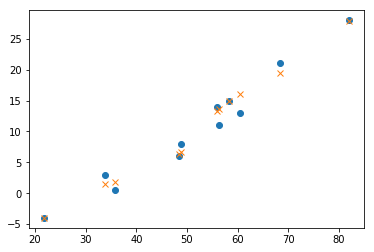

In [138]:
from matplotlib import pyplot as plt

plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_u.numpy(), model(0.1 * t_u).detach().numpy(), 'x')

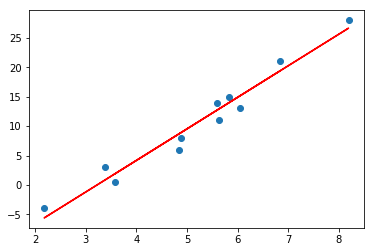

In [94]:
from matplotlib import pyplot as plt

plt.plot(t_un.numpy(), t_c.numpy(), 'o')
plt.plot(t_un.numpy(), model(t_un, w, b).numpy(), 'r-')

#plt.plot(t_u.numpy(), model(0.1 * t_u).detach().numpy(), 'x')